In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
import pandas as pd

# Load the uploaded CSV file
csv_path = "./Animal_Dataset.csv"
df = pd.read_csv(csv_path)

# Show the first few rows and column names
df.head(), df.columns.tolist()


(             Animal Height (cm) Weight (kg)         Color Lifespan (years)  \
 0          Aardvark     105-130       40-65          Grey            20-30   
 1          Aardwolf       40-50        8-14  Yellow-brown            10-12   
 2  African Elephant     270-310   2700-6000          Grey            60-70   
 3      African Lion      80-110     120-250           Tan            10-14   
 4  African Wild Dog       75-80       18-36  Multicolored            10-12   
 
           Diet               Habitat           Predators Average Speed (km/h)  \
 0  Insectivore  Savannas, Grasslands       Lions, Hyenas                   40   
 1  Insectivore  Grasslands, Savannas     Lions, Leopards                24-30   
 2    Herbivore      Savannah, Forest       Lions, Hyenas                   25   
 3    Carnivore  Grasslands, Savannas  Hyenas, Crocodiles                   58   
 4    Carnivore             Savannahs       Lions, Hyenas                   56   
 
                Countries Foun

In [3]:
import numpy as np

# Helper function to convert range strings like "105-130" or "2-4 (usually)" to average float
def parse_range(value):
    if pd.isna(value):
        return np.nan
    value = str(value)
    value = value.split('(')[0].strip()  # Remove any text in parentheses
    parts = [p.strip() for p in value.replace('–', '-').split('-')]
    if len(parts) == 2:
        try:
            return (float(parts[0]) + float(parts[1])) / 2
        except ValueError:
            return np.nan
    try:
        return float(parts[0])
    except ValueError:
        return np.nan

# ✅ Create cleaned DataFrame
df_clean = pd.DataFrame()
df_clean["name"] = df["Animal"]
df_clean["height_cm"] = df["Height (cm)"].apply(parse_range)
df_clean["weight_kg"] = df["Weight (kg)"].apply(parse_range)
df_clean["color"] = df["Color"]
df_clean["lifespan_years"] = df["Lifespan (years)"].apply(parse_range)
df_clean["diet"] = df["Diet"]
df_clean["habitat"] = df["Habitat"]
df_clean["predators"] = df["Predators"]
df_clean["avg_speed_kmh"] = df["Average Speed (km/h)"].apply(parse_range)
df_clean["conservation_status"] = df["Conservation Status"]
df_clean["family"] = df["Family"]
df_clean["gestation_period_days"] = df["Gestation Period (days)"].apply(parse_range)
df_clean["social_structure"] = df["Social Structure"]
df_clean["offspring_per_birth"] = df["Offspring per Birth"].apply(parse_range)

# ✅ Now drop duplicates based on lowercase/stripped names
df_clean["name_lower"] = df_clean["name"].str.lower().str.strip()
df_clean = df_clean.drop_duplicates(subset="name_lower", keep="first").drop(columns=["name_lower"])

# Preview result
df_clean.head(30)

,name,height_cm,weight_kg,color,lifespan_years,diet,habitat,predators,avg_speed_kmh,conservation_status,family,gestation_period_days,social_structure,offspring_per_birth
0,Aardvark,117.5,52.500,Grey,25.0,Insectivore,"Savannas, Grasslands","Lions, Hyenas",40.00,Least Concern,Orycteropodidae,225.0,Solitary,1.0
1,Aardwolf,45.0,11.000,Yellow-brown,11.0,Insectivore,"Grasslands, Savannas","Lions, Leopards",27.00,Least Concern,Hyaenidae,90.0,Solitary,3.5
2,African Elephant,290.0,4350.000,Grey,65.0,Herbivore,"Savannah, Forest","Lions, Hyenas",25.00,Vulnerable,Elephantidae,650.0,Herd-based,1.0
3,African Lion,95.0,185.000,Tan,12.0,Carnivore,"Grasslands, Savannas","Hyenas, Crocodiles",58.00,Vulnerable,Felidae,101.5,Group-based,3.0
4,African Wild Dog,77.5,27.000,Multicolored,11.0,Carnivore,Savannahs,"Lions, Hyenas",56.00,Endangered,Canidae,70.0,Group-based,11.0
5,Alpine Ibex,84.0,69.500,Brown,17.5,Herbivore,"Mountains, Alpine","Wolves, Golden Eagles",60.00,Least Concern,Bovidae,150.0,Group-based,1.0
6,Amazon Rainforest Frog,7.5,NaN,Various,10.5,Insectivore,Amazon Rainforest,"Birds, Snakes",0.55,Not Evaluated,Dendrobatidae,12.5,Solitary,NaN
7,American Bison,169.0,NaN,Brown,17.5,Herbivore,"Grasslands, Plains","Wolves, Grizzly Bears",48.00,Near Threatened,Bovidae,280.0,Group-based,1.0
8,Anteater,71.5,31.500,"Brown, White",17.5,Insectivore,"Grasslands, Forests","Jaguars, Pumas",24.00,Least Concern,Myrmecophagidae,200.0,Solitary,1.0
9,Arabian Horse,150.0,690.000,Various,27.5,Herbivore,"Middle East, North Africa","Humans, Predators",65.00,Not Applicable,Equidae,336.0,Herd-based,1.0


In [ ]:
from sqlalchemy import text, create_engine

# Define the database connection
db_user = 'postgres'
db_password = 'postgres'
db_host = 'localhost'
db_port = '5431'
db_name = 'akigator_db'
connection_uri = f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'
engine = create_engine(connection_uri)

# Define the category data
category_data = {
    "category_id": 2,
    "name": "Animals",
    "description": "Living organisms that feed on organic matter."
}

# Insert into categories table
with engine.begin() as conn:  # Use the 'engine' instance defined earlier
    insert_stmt = text("""
        INSERT INTO categories (category_id, name, description)
        VALUES (:category_id, :name, :description)
        ON CONFLICT (name) DO NOTHING
    """)
    conn.execute(insert_stmt, category_data)

print("Category 'Animals' inserted (or already exists).")

OperationalError: (psycopg2.OperationalError) could not translate host name "postgresql" to address: Name or service not known

(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [14]:
from sqlalchemy import create_engine
import pandas as pd

# Connection config
db_user = 'postgres'
db_password = 'postgres'
db_host = 'localhost'
db_port = '5431'
db_name = 'akigator_db'

# Connection URI
connection_uri = f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'
engine = create_engine(connection_uri)

# ✅ STEP 1: Fetch already inserted animal names
existing_animals = pd.read_sql("SELECT name FROM animals", engine)
existing_names = set(existing_animals["name"].str.strip().str.lower())

# ✅ STEP 2: Normalize 'name' column in df_clean and filter
df_clean["name_normalized"] = df_clean["name"].str.strip().str.lower()
df_clean_filtered = df_clean[~df_clean["name_normalized"].isin(existing_names)].drop(columns=["name_normalized"])

# ✅ STEP 3: Insert only new data
if not df_clean_filtered.empty:
    df_clean_filtered.to_sql('animals', engine, if_exists='append', index=False)
    print(f"✅ Inserted {len(df_clean_filtered)} new animals into the database.")
else:
    print("✅ No new animals to insert. All already exist.")

✅ Inserted 196 new animals into the database.


In [15]:
# First, retrieve the inserted animals and their IDs
animals_in_db = pd.read_sql("SELECT animal_id, name FROM animals", engine)

# Retrieve existing entity names from the entities table
existing_entities = pd.read_sql("SELECT name FROM entities", engine)
existing_entity_names = set(existing_entities["name"].str.strip().str.lower())

# Now insert into entities with category_id = 2
entities = animals_in_db.copy()
entities["category_id"] = 2  # as given
entities["animal_id"] = entities["animal_id"]  # explicit
entities.rename(columns={"name": "name"}, inplace=True)

# Filter out rows that already exist in the entities table
entities["name_normalized"] = entities["name"].str.strip().str.lower()
entities_to_insert = entities[~entities["name_normalized"].isin(existing_entity_names)].drop(columns=["name_normalized"])

# Insert to entities table
if not entities_to_insert.empty:
	entities_to_insert.to_sql("entities", engine, if_exists="append", index=False)
	print(f"✅ {len(entities_to_insert)} new animal entities added.")
else:
	print("✅ No new animal entities to add. All already exist.")


✅ 196 new animal entities added.


In [31]:
import pandas as pd
from sqlalchemy import create_engine
import sqlalchemy
from collections import Counter
import numpy as np
import random

# Set up database connection (replace with your credentials)
db_user = 'postgres'
db_password = 'postgres'
db_host = 'localhost'
db_port = '5431'
db_name = 'akigator_db'
connection_uri = f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'
engine = create_engine(connection_uri)

# Load your animal data (assuming you have this already)
data = pd.read_csv("Animal Dataset.csv")
target_column = "Animal"
features = [col for col in data.columns if col != target_column]

# --- Your existing functions ---
def entropy(y):
    """Calculates entropy of a set of labels."""
    counts = Counter(y)
    probabilities = [count / len(y) for count in counts.values()]
    return -sum(p * np.log2(p) for p in probabilities if p > 0)

def information_gain(data, feature, target):
    """Calculates information gain for a given feature."""
    total_entropy = entropy(data[target])
    values = data[feature].unique()
    weighted_entropy = 0
    for value in values:
        subset = data[data[feature] == value]
        weighted_entropy += (len(subset) / len(data)) * entropy(subset[target])
    return total_entropy - weighted_entropy

def select_best_question(data, features, target):
    """Selects the feature with the highest information gain."""
    gains = {feature: information_gain(data, feature, target) for feature in features}
    return max(gains, key=gains.get)

def akinator_with_db_insertion(data, features, target, category_id=2):
    current_data = data.copy()
    asked_questions = []
    question_counter = 0
    num_answers_to_show = 5  # Ustawiamy stałą liczbę odpowiedzi do wyświetlenia

    first_question = "Color"
    print(f"Question: What color is the animal?")
    unique_colors = current_data[first_question].unique()
    random_colors = random.sample(list(unique_colors), min(num_answers_to_show, len(unique_colors)))
    first_question_options = list(random_colors) + ["No answer"]
    for i, option in enumerate(first_question_options):
        print(f"{i+1}: {option}")

    # Insert the first question into the database and get its question_id
    question_id = insert_question_and_get_id(first_question, category_id)
    asked_questions.append(first_question)
    question_counter += 1

    # Ask the first question
    try:
        answer_index = int(input("Enter the number of your answer: ")) - 1
        if 0 <= answer_index < len(random_colors):
            answer = random_colors[answer_index]
            current_data = current_data[current_data[first_question] == answer]
        elif answer_index == len(random_colors):
            answer = "No answer"
        else:
            print("Invalid input. Please try again.")
            return
        insert_all_possible_answers(question_id, first_question_options, first_question, current_data, target)
    except (ValueError, IndexError):
        print("Invalid input. Please try again.")
        return

    while len(current_data[target].unique()) > 1 and question_counter < 20:
        remaining_features = [f for f in features if f not in asked_questions]
        if not remaining_features:
            print("No more questions to ask.")
            break

        best_question = select_best_question(current_data, remaining_features, target)
        asked_questions.append(best_question)
        question_counter += 1

        print(f"Question: {best_question}?")
        unique_values = current_data[best_question].unique()
        num_to_sample = min(num_answers_to_show, len(unique_values))
        random_values = random.sample(list(unique_values), num_to_sample)
        current_question_options = list(random_values) + ["No answer"]
        for i, val in enumerate(current_question_options):
            print(f"{i+1}: {val}")

        # Insert the current question into the database and get its question_id
        question_id = insert_question_and_get_id(best_question, category_id)

        try:
            answer_index = int(input("Enter the number of your answer: ")) - 1
            if 0 <= answer_index < len(random_values):
                answer = random_values[answer_index]
                current_data = current_data[current_data[best_question] == answer]
            elif answer_index == len(current_question_options) - 1:
                answer = "No answer"
            else:
                print("Invalid input. Please try again.")
                return
            insert_all_possible_answers(question_id, current_question_options, best_question, current_data, target)
        except (ValueError, IndexError):
            print("Invalid input. Please try again.")
            return

        if len(current_data) == 0:
            print("Sorry, I don't have an animal that matches your answers.")
            return

    if len(current_data[target].unique()) == 1:
        print(f"I think your animal is: {current_data[target].iloc[0]}")
    else:
        print("I could not determine the animal")

# --- Helper functions for database interaction ---
def insert_question_and_get_id(question_text, category_id):
    """Inserts a question into the database and returns its ID."""
    with engine.begin() as conn:
        # Check if the question already exists in the database
        existing_question = conn.execute(
            sqlalchemy.text("SELECT question_id FROM questions WHERE content = :content AND category_id = :category_id"),
            {"content": question_text, "category_id": category_id}
        ).fetchone()

        if existing_question:
            return existing_question[0]

        # If question doesn't exist, insert it into the questions table
        category_exists = conn.execute(
            sqlalchemy.text("SELECT 1 FROM categories WHERE category_id = :category_id"),
            {"category_id": category_id}
        ).fetchone()

        if not category_exists:
            raise ValueError(f"Category with ID {category_id} doesn't exist. Check the 'categories' table.")

        # Insert the question and get the newly inserted question_id
        result = conn.execute(
            sqlalchemy.text(
                "INSERT INTO questions (content, category_id) VALUES (:content, :category_id) RETURNING question_id"
            ),
            {"content": question_text, "category_id": category_id}
        )

        # Verify that the question was inserted and the id is returned correctly
        question_id = result.fetchone()[0]
        print(f"Question inserted with ID: {question_id}")
        return question_id

def insert_all_possible_answers(question_id, options, question_name, current_data, target):
    """Insert all possible answer options to the 'answers' table for the current question."""
    animals_in_db = pd.read_sql("SELECT animal_id, name FROM animals", engine)
    entity_name_to_id = dict(zip(animals_in_db['name'], animals_in_db['animal_id']))

    with engine.begin() as conn:  # Autocommit enabled
        for value in options:
            entity_id = None
            if value != "No answer":
                matching_animals = current_data[current_data[question_name] == value][target].unique()
                if len(matching_animals) == 1:
                    entity_id = entity_name_to_id.get(matching_animals[0])

            conn.execute(
                sqlalchemy.text(
                    "INSERT INTO answers (question_id, entity_id, response) VALUES (:question_id, :entity_id, :response)"
                ),
                {"question_id": question_id, "entity_id": entity_id, "response": value}
            )

def get_entity_id_from_answer(answer, current_data, best_question, target):
    try:
        possible_animals = current_data[current_data[best_question] == answer][target].unique()
        if len(possible_animals) == 1:
            animal_name = possible_animals[0]
            animals_in_db = pd.read_sql("SELECT animal_id, name FROM animals", engine)
            entity_name_to_id = dict(zip(animals_in_db['name'], animals_in_db['animal_id']))
            return entity_name_to_id.get(animal_name)
    except Exception as e:
        print("Entity resolution error:", e)
    return None

# --- Run Akinator and insert into the database ---
akinator_with_db_insertion(data, features, target_column)

Question: What color is the animal?
1: Dark Brown, White
2: Reddish-brown
3: Red, White
4: Black, Grey
5: Pinkish
6: No answer
Question inserted with ID: 8
I think your animal is: Okapi


In [32]:
df = pd.read_csv('Animal Dataset.csv') 

In [33]:
df.shape 

(205, 16)

In [34]:

df.head(10).style.set_properties(**{'background-color': 'yellow',
                           'color': 'black'})

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

In [ ]:
pd.DataFrame(df.columns,columns=['column name']) 


,column name
0,Animal
1,Height (cm)
2,Weight (kg)
3,Color
4,Lifespan (years)
5,Diet
6,Habitat
7,Predators
8,Average Speed (km/h)
9,Countries Found


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Animal                   205 non-null    object
 1   Height (cm)              205 non-null    object
 2   Weight (kg)              205 non-null    object
 3   Color                    205 non-null    object
 4   Lifespan (years)         205 non-null    object
 5   Diet                     205 non-null    object
 6   Habitat                  205 non-null    object
 7   Predators                205 non-null    object
 8   Average Speed (km/h)     205 non-null    object
 9   Countries Found          205 non-null    object
 10  Conservation Status      205 non-null    object
 11  Family                   205 non-null    object
 12  Gestation Period (days)  205 non-null    object
 13  Top Speed (km/h)         205 non-null    object
 14  Social Structure         205 non-null    o

**Data Cleaning**

As we can see in the data numerci columns have '-' in between values we can replace such values with mean of the left and right values of the '-'.

In [ ]:
df.columns

Index(['Animal', 'Height (cm)', 'Weight (kg)', 'Color', 'Lifespan (years)',
       'Diet', 'Habitat', 'Predators', 'Average Speed (km/h)',
       'Countries Found', 'Conservation Status', 'Family',
       'Gestation Period (days)', 'Top Speed (km/h)', 'Social Structure',
       'Offspring per Birth'],
      dtype='object')

In [ ]:
df

,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Habitat,Predators,Average Speed (km/h),Countries Found,Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth
0,Aardvark,105-130,40-65,Grey,20-30,Insectivore,"Savannas, Grasslands","Lions, Hyenas",40,Africa,Least Concern,Orycteropodidae,210-240,40,Solitary,1
1,Aardwolf,40-50,8-14,Yellow-brown,10-12,Insectivore,"Grasslands, Savannas","Lions, Leopards",24-30,Eastern and Southern Africa,Least Concern,Hyaenidae,90,40,Solitary,2-5
2,African Elephant,270-310,2700-6000,Grey,60-70,Herbivore,"Savannah, Forest","Lions, Hyenas",25,Africa,Vulnerable,Elephantidae,640-660,40,Herd-based,1
3,African Lion,80-110,120-250,Tan,10-14,Carnivore,"Grasslands, Savannas","Hyenas, Crocodiles",58,Africa,Vulnerable,Felidae,98-105,80,Group-based,2-4 (usually)
4,African Wild Dog,75-80,18-36,Multicolored,10-12,Carnivore,Savannahs,"Lions, Hyenas",56,Sub-Saharan Africa,Endangered,Canidae,70,56,Group-based,10-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Yak,140-160,500-1200,"Brown, Black",20-25,Herbivore,Mountains,"Snow Leopards, Wolves",24,"Himalayas, Central Asia",Least Concern,Bovidae,215-280,24,Group-based,10-50
201,Yellow-Eyed Penguin,60-65,1-3,"Yellow, White",Up to 20,Carnivore,Coastal Areas,"Seals, Orcas",25,New Zealand,Endangered,Spheniscidae,80-90,25,Solitary,1
202,Yeti Crab,Up to 15,Up to 0.5,"White, Hairy",Up to 20,Omnivore,Hydrothermal Vents,Not Applicable,Not Applicable,Pacific Ocean,Not Evaluated,Kiwaidae,Not Applicable,Not Applicable,Solitary,Not Applicable
203,Zebra,220-340,400-900,"Black, White",20-25,Herbivore,Grasslands,"Lions, Hyenas",25,Africa,Least Concern,Equidae,180-365,25,Group-based,5-20


First we will reomve all upto values in columns where it is present

In [ ]:
columns_with_upto=['Height (cm)','Weight (kg)','Lifespan (years)','Offspring per Birth']

In [ ]:
#pd.DataFrame(df['Height (cm)'][df['Height (cm)'].str.match(regex)]) 

In [ ]:
for x in columns_with_upto:
    regex='Up.*'
    df[x][df[x].str.match(regex)]=df[x][df[x].str.match(regex)].str.split(' ',expand=True)[2]


We need to change the datatype of numeric columns as every column type is string datatype.

In [ ]:
df

,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Habitat,Predators,Average Speed (km/h),Countries Found,Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth
0,Aardvark,105-130,40-65,Grey,20-30,Insectivore,"Savannas, Grasslands","Lions, Hyenas",40,Africa,Least Concern,Orycteropodidae,210-240,40,Solitary,1
1,Aardwolf,40-50,8-14,Yellow-brown,10-12,Insectivore,"Grasslands, Savannas","Lions, Leopards",24-30,Eastern and Southern Africa,Least Concern,Hyaenidae,90,40,Solitary,2-5
2,African Elephant,270-310,2700-6000,Grey,60-70,Herbivore,"Savannah, Forest","Lions, Hyenas",25,Africa,Vulnerable,Elephantidae,640-660,40,Herd-based,1
3,African Lion,80-110,120-250,Tan,10-14,Carnivore,"Grasslands, Savannas","Hyenas, Crocodiles",58,Africa,Vulnerable,Felidae,98-105,80,Group-based,2-4 (usually)
4,African Wild Dog,75-80,18-36,Multicolored,10-12,Carnivore,Savannahs,"Lions, Hyenas",56,Sub-Saharan Africa,Endangered,Canidae,70,56,Group-based,10-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Yak,140-160,500-1200,"Brown, Black",20-25,Herbivore,Mountains,"Snow Leopards, Wolves",24,"Himalayas, Central Asia",Least Concern,Bovidae,215-280,24,Group-based,10-50
201,Yellow-Eyed Penguin,60-65,1-3,"Yellow, White",20,Carnivore,Coastal Areas,"Seals, Orcas",25,New Zealand,Endangered,Spheniscidae,80-90,25,Solitary,1
202,Yeti Crab,15,0.5,"White, Hairy",20,Omnivore,Hydrothermal Vents,Not Applicable,Not Applicable,Pacific Ocean,Not Evaluated,Kiwaidae,Not Applicable,Not Applicable,Solitary,Not Applicable
203,Zebra,220-340,400-900,"Black, White",20-25,Herbivore,Grasslands,"Lions, Hyenas",25,Africa,Least Concern,Equidae,180-365,25,Group-based,5-20


In [ ]:
df.columns

Index(['Animal', 'Height (cm)', 'Weight (kg)', 'Color', 'Lifespan (years)',
       'Diet', 'Habitat', 'Predators', 'Average Speed (km/h)',
       'Countries Found', 'Conservation Status', 'Family',
       'Gestation Period (days)', 'Top Speed (km/h)', 'Social Structure',
       'Offspring per Birth'],
      dtype='object')

In [ ]:
for x in ['Height (cm)','Weight (kg)','Lifespan (years)','Average Speed (km/h)','Gestation Period (days)','Offspring per Birth','Top Speed (km/h)']:
    ab=df[x][df[x].str.contains('-')]
    df[x][df[x].str.contains('-')]=ab.str.split('-').str.get(-1)

In [ ]:
df

,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Habitat,Predators,Average Speed (km/h),Countries Found,Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth
0,Aardvark,130,65,Grey,30,Insectivore,"Savannas, Grasslands","Lions, Hyenas",40,Africa,Least Concern,Orycteropodidae,240,40,Solitary,1
1,Aardwolf,50,14,Yellow-brown,12,Insectivore,"Grasslands, Savannas","Lions, Leopards",30,Eastern and Southern Africa,Least Concern,Hyaenidae,90,40,Solitary,5
2,African Elephant,310,6000,Grey,70,Herbivore,"Savannah, Forest","Lions, Hyenas",25,Africa,Vulnerable,Elephantidae,660,40,Herd-based,1
3,African Lion,110,250,Tan,14,Carnivore,"Grasslands, Savannas","Hyenas, Crocodiles",58,Africa,Vulnerable,Felidae,105,80,Group-based,4 (usually)
4,African Wild Dog,80,36,Multicolored,12,Carnivore,Savannahs,"Lions, Hyenas",56,Sub-Saharan Africa,Endangered,Canidae,70,56,Group-based,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Yak,160,1200,"Brown, Black",25,Herbivore,Mountains,"Snow Leopards, Wolves",24,"Himalayas, Central Asia",Least Concern,Bovidae,280,24,Group-based,50
201,Yellow-Eyed Penguin,65,3,"Yellow, White",20,Carnivore,Coastal Areas,"Seals, Orcas",25,New Zealand,Endangered,Spheniscidae,90,25,Solitary,1
202,Yeti Crab,15,0.5,"White, Hairy",20,Omnivore,Hydrothermal Vents,Not Applicable,Not Applicable,Pacific Ocean,Not Evaluated,Kiwaidae,Not Applicable,Not Applicable,Solitary,Not Applicable
203,Zebra,340,900,"Black, White",25,Herbivore,Grasslands,"Lions, Hyenas",25,Africa,Least Concern,Equidae,365,25,Group-based,20


In [ ]:
df['Offspring per Birth'][df['Offspring per Birth'].str.endswith('(usually)')]=3

In [ ]:
df

,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Habitat,Predators,Average Speed (km/h),Countries Found,Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth
0,Aardvark,130,65,Grey,30,Insectivore,"Savannas, Grasslands","Lions, Hyenas",40,Africa,Least Concern,Orycteropodidae,240,40,Solitary,1
1,Aardwolf,50,14,Yellow-brown,12,Insectivore,"Grasslands, Savannas","Lions, Leopards",30,Eastern and Southern Africa,Least Concern,Hyaenidae,90,40,Solitary,5
2,African Elephant,310,6000,Grey,70,Herbivore,"Savannah, Forest","Lions, Hyenas",25,Africa,Vulnerable,Elephantidae,660,40,Herd-based,1
3,African Lion,110,250,Tan,14,Carnivore,"Grasslands, Savannas","Hyenas, Crocodiles",58,Africa,Vulnerable,Felidae,105,80,Group-based,3
4,African Wild Dog,80,36,Multicolored,12,Carnivore,Savannahs,"Lions, Hyenas",56,Sub-Saharan Africa,Endangered,Canidae,70,56,Group-based,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Yak,160,1200,"Brown, Black",25,Herbivore,Mountains,"Snow Leopards, Wolves",24,"Himalayas, Central Asia",Least Concern,Bovidae,280,24,Group-based,50
201,Yellow-Eyed Penguin,65,3,"Yellow, White",20,Carnivore,Coastal Areas,"Seals, Orcas",25,New Zealand,Endangered,Spheniscidae,90,25,Solitary,1
202,Yeti Crab,15,0.5,"White, Hairy",20,Omnivore,Hydrothermal Vents,Not Applicable,Not Applicable,Pacific Ocean,Not Evaluated,Kiwaidae,Not Applicable,Not Applicable,Solitary,Not Applicable
203,Zebra,340,900,"Black, White",25,Herbivore,Grasslands,"Lions, Hyenas",25,Africa,Least Concern,Equidae,365,25,Group-based,20


In [ ]:
for x in ['Countries Found','Habitat','Predators']:
    split_columns = df[x].str.split(', ', expand=True)
    split_columns.columns = [f'{x} {i+1}' for i in range(split_columns.shape[1])]
    df = pd.concat([df, split_columns], axis=1)
    df.drop(columns=[x], inplace=True)

In [ ]:
df

,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Average Speed (km/h),Conservation Status,Family,Gestation Period (days),...,Offspring per Birth,Countries Found 1,Countries Found 2,Countries Found 3,Countries Found 4,Habitat 1,Habitat 2,Habitat 3,Predators 1,Predators 2
0,Aardvark,130,65,Grey,30,Insectivore,40,Least Concern,Orycteropodidae,240,...,1,Africa,None,None,None,Savannas,Grasslands,None,Lions,Hyenas
1,Aardwolf,50,14,Yellow-brown,12,Insectivore,30,Least Concern,Hyaenidae,90,...,5,Eastern and Southern Africa,None,None,None,Grasslands,Savannas,None,Lions,Leopards
2,African Elephant,310,6000,Grey,70,Herbivore,25,Vulnerable,Elephantidae,660,...,1,Africa,None,None,None,Savannah,Forest,None,Lions,Hyenas
3,African Lion,110,250,Tan,14,Carnivore,58,Vulnerable,Felidae,105,...,3,Africa,None,None,None,Grasslands,Savannas,None,Hyenas,Crocodiles
4,African Wild Dog,80,36,Multicolored,12,Carnivore,56,Endangered,Canidae,70,...,12,Sub-Saharan Africa,None,None,None,Savannahs,None,None,Lions,Hyenas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Yak,160,1200,"Brown, Black",25,Herbivore,24,Least Concern,Bovidae,280,...,50,Himalayas,Central Asia,None,None,Mountains,None,None,Snow Leopards,Wolves
201,Yellow-Eyed Penguin,65,3,"Yellow, White",20,Carnivore,25,Endangered,Spheniscidae,90,...,1,New Zealand,None,None,None,Coastal Areas,None,None,Seals,Orcas
202,Yeti Crab,15,0.5,"White, Hairy",20,Omnivore,Not Applicable,Not Evaluated,Kiwaidae,Not Applicable,...,Not Applicable,Pacific Ocean,None,None,None,Hydrothermal Vents,None,None,Not Applicable,None
203,Zebra,340,900,"Black, White",25,Herbivore,25,Least Concern,Equidae,365,...,20,Africa,None,None,None,Grasslands,None,None,Lions,Hyenas


In [ ]:
df['Countries Found 4'].replace('None',np.nan,inplace=True)
df['Countries Found 3'].replace('None',np.nan,inplace=True)
df['Countries Found 2'].replace('None',np.nan,inplace=True)


In [ ]:
print(df['Countries Found 4'].isna().sum(),df['Countries Found 3'].isna().sum(),df['Countries Found 2'].isna().sum())

203 187 150


In [ ]:
df.shape

(205, 22)

As we can see most of the countries columns - 'Country found 2','Country found 3,'Country found 4' have too many missing values thus dropping them.

In [ ]:
df.drop(columns=['Countries Found 2','Countries Found 3','Countries Found 4'], inplace=True)

In [ ]:
df = df.rename(columns={'Countries Found 1': 'Countries Found'})

In [ ]:
df['Habitat 1'].replace('None',np.nan,inplace=True)
df['Habitat 2'].replace('None',np.nan,inplace=True)
df['Predators 1'].replace('None',np.nan,inplace=True)

df['Predators 2'].replace('None',np.nan,inplace=True)


In [ ]:
print(df['Habitat 1'].isna().sum(),df['Habitat 2'].isna().sum(),df['Habitat 3'].isna().sum())

0 121 204


In [ ]:
print(df['Predators 1'].isna().sum(),df['Predators 2'].isna().sum())

0 39


filling the same values in Habitat 2 from Habitat 1 where there is None.

In [ ]:
df['Habitat 2'] = df['Habitat 2'].fillna(df['Habitat 1'])

Dropping Habitat 3 as it has lots of missing values which makes the column not usable

In [ ]:
df.drop(columns=['Habitat 3'], inplace=True)

Filling the same values for predator 2 from predator 1 where there is no value

In [ ]:
df['Predators 2'] = df['Predators 2'].fillna(df['Predators 1'])

In [ ]:
df.shape

(205, 18)

we can drop column 

In [ ]:
df

,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Average Speed (km/h),Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth,Countries Found,Habitat 1,Habitat 2,Predators 1,Predators 2
0,Aardvark,130,65,Grey,30,Insectivore,40,Least Concern,Orycteropodidae,240,40,Solitary,1,Africa,Savannas,Grasslands,Lions,Hyenas
1,Aardwolf,50,14,Yellow-brown,12,Insectivore,30,Least Concern,Hyaenidae,90,40,Solitary,5,Eastern and Southern Africa,Grasslands,Savannas,Lions,Leopards
2,African Elephant,310,6000,Grey,70,Herbivore,25,Vulnerable,Elephantidae,660,40,Herd-based,1,Africa,Savannah,Forest,Lions,Hyenas
3,African Lion,110,250,Tan,14,Carnivore,58,Vulnerable,Felidae,105,80,Group-based,3,Africa,Grasslands,Savannas,Hyenas,Crocodiles
4,African Wild Dog,80,36,Multicolored,12,Carnivore,56,Endangered,Canidae,70,56,Group-based,12,Sub-Saharan Africa,Savannahs,Savannahs,Lions,Hyenas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Yak,160,1200,"Brown, Black",25,Herbivore,24,Least Concern,Bovidae,280,24,Group-based,50,Himalayas,Mountains,Mountains,Snow Leopards,Wolves
201,Yellow-Eyed Penguin,65,3,"Yellow, White",20,Carnivore,25,Endangered,Spheniscidae,90,25,Solitary,1,New Zealand,Coastal Areas,Coastal Areas,Seals,Orcas
202,Yeti Crab,15,0.5,"White, Hairy",20,Omnivore,Not Applicable,Not Evaluated,Kiwaidae,Not Applicable,Not Applicable,Solitary,Not Applicable,Pacific Ocean,Hydrothermal Vents,Hydrothermal Vents,Not Applicable,Not Applicable
203,Zebra,340,900,"Black, White",25,Herbivore,25,Least Concern,Equidae,365,25,Group-based,20,Africa,Grasslands,Grasslands,Lions,Hyenas


**work on missing values and NULLS**

In [ ]:
df.isna().sum()

Animal                     0
Height (cm)                0
Weight (kg)                0
Color                      0
Lifespan (years)           0
Diet                       0
Average Speed (km/h)       0
Conservation Status        0
Family                     0
Gestation Period (days)    0
Top Speed (km/h)           0
Social Structure           0
Offspring per Birth        0
Countries Found            0
Habitat 1                  0
Habitat 2                  0
Predators 1                0
Predators 2                0
dtype: int64

In [ ]:
df.replace('Not Applicable',np.nan,inplace=True)

it is better to drop the data with missing values as replacing them with mean mode median values would not give accurate data for that animal.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df[df['Height (cm)'].isna()]

,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Average Speed (km/h),Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth,Countries Found,Habitat 1,Habitat 2,Predators 1,Predators 2


In [ ]:
df.dropna(subset=['Height (cm)'],inplace=True)

In [ ]:
df.isna().sum()

Animal                     0
Height (cm)                0
Weight (kg)                0
Color                      0
Lifespan (years)           0
Diet                       0
Average Speed (km/h)       0
Conservation Status        0
Family                     0
Gestation Period (days)    0
Top Speed (km/h)           0
Social Structure           0
Offspring per Birth        0
Countries Found            0
Habitat 1                  0
Habitat 2                  0
Predators 1                0
Predators 2                0
dtype: int64

In [ ]:
df.dropna(inplace=True)

**fixing special character values for each columns**

In [ ]:
df.isna().sum()

Animal                     0
Height (cm)                0
Weight (kg)                0
Color                      0
Lifespan (years)           0
Diet                       0
Average Speed (km/h)       0
Conservation Status        0
Family                     0
Gestation Period (days)    0
Top Speed (km/h)           0
Social Structure           0
Offspring per Birth        0
Countries Found            0
Habitat 1                  0
Habitat 2                  0
Predators 1                0
Predators 2                0
dtype: int64

In [ ]:
df.loc[df['Height (cm)'] == '']

,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Average Speed (km/h),Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth,Countries Found,Habitat 1,Habitat 2,Predators 1,Predators 2


In [ ]:
df.drop(df[df['Height (cm)'] == ''].index,inplace= True)

In [ ]:
df.replace(',', '', regex=True,inplace=True)

In [ ]:
df.replace('Varies',np.nan,inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Lifespan (years)']=df['Lifespan (years)'].str.replace(r'\+', '', regex=True)

In [ ]:
df['Average Speed (km/h)'][df['Average Speed (km/h)'].str.contains(r'.*water.*', regex=True)]=df['Average Speed (km/h)'][df['Average Speed (km/h)'].str.contains(r'.*water.*', regex=True)].str.split(" ",expand=True)[0]

In [ ]:
df.replace(r'\(in burrow\)','',regex=True,inplace=True)

In [ ]:
df['Gestation Period (days)'][df['Gestation Period (days)'].str.contains(r'.*days.*', regex=True)]='10'

In [ ]:
df['Gestation Period (days)'][df['Gestation Period (days)'].str.contains(r'.*weeks.*', regex=True)]

129    9 weeks
Name: Gestation Period (days), dtype: object

In [ ]:
df['Gestation Period (days)'][df['Gestation Period (days)'].str.contains(r'.*weeks.*', regex=True)]=f'{9 * 7}'

In [ ]:
df['Gestation Period (days)'][df['Gestation Period (days)'].str.contains(r'.*months.*', regex=True)]

23     42 months
32     12 months
37     12 months
54     14 months
81     18 months
103     8 months
121    16 months
Name: Gestation Period (days), dtype: object

In [ ]:
df['Gestation Period (days)'] = df['Gestation Period (days)'].apply(
    lambda x: f'{int(x.split()[0]) * 30}' if 'months' in x else x
)



In [ ]:
df['Offspring per Birth']=df['Offspring per Birth'].str.replace(r')',"")

In [ ]:
df['Offspring per Birth']=df['Offspring per Birth'].str.replace(r'Hundreds',"100")

In [ ]:

non_convertible_values = []
for value in df['Offspring per Birth']:
    try:
        float(value)
    except ValueError:
        non_convertible_values.append(value)
df['Offspring per Birth'][df['Offspring per Birth'].isin(non_convertible_values)] = df['Offspring per Birth'][df['Offspring per Birth'].isin(non_convertible_values)].str.split(" ",expand=True)[0]


In [ ]:
df.columns

Index(['Animal', 'Height (cm)', 'Weight (kg)', 'Color', 'Lifespan (years)',
       'Diet', 'Average Speed (km/h)', 'Conservation Status', 'Family',
       'Gestation Period (days)', 'Top Speed (km/h)', 'Social Structure',
       'Offspring per Birth', 'Countries Found', 'Habitat 1', 'Habitat 2',
       'Predators 1', 'Predators 2'],
      dtype='object')

To correct the data types of different columns

In [ ]:
float_columns = ['Height (cm)','Weight (kg)','Lifespan (years)','Average Speed (km/h)','Gestation Period (days)','Top Speed (km/h)','Offspring per Birth']
for x in float_columns:    
    df[x] = df[x].str.replace('[a-zA-Z]', '', regex=True)
    df[x] = df[x].astype(float)


In [ ]:
df['Height-to-Weight Ratio'] = df['Height (cm)'] / df['Weight (kg)']

![](https://d1jyxxz9imt9yb.cloudfront.net/animal/115/meta_image/regular/WR202206_GiraffeTranslocation_012_360559_reduced.jpg)

**EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 0 to 204
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Animal                   152 non-null    object 
 1   Height (cm)              152 non-null    float64
 2   Weight (kg)              152 non-null    float64
 3   Color                    152 non-null    object 
 4   Lifespan (years)         152 non-null    float64
 5   Diet                     152 non-null    object 
 6   Average Speed (km/h)     152 non-null    float64
 7   Conservation Status      152 non-null    object 
 8   Family                   152 non-null    object 
 9   Gestation Period (days)  152 non-null    float64
 10  Top Speed (km/h)         152 non-null    float64
 11  Social Structure         152 non-null    object 
 12  Offspring per Birth      150 non-null    float64
 13  Countries Found          152 non-null    object 
 14  Habitat 1                152 no

In [ ]:
pd.DataFrame(df.describe()).style\
    .set_properties(**{'background-color': 'lightyellow',
                      'color': 'black'})

,Height (cm),Weight (kg),Lifespan (years),Average Speed (km/h),Gestation Period (days),Top Speed (km/h),Offspring per Birth,Height-to-Weight Ratio
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,150.000000,152.000000
mean,197.174342,904.983684,26.572368,37.679868,179.335526,39.012105,1428.120000,13.191480
std,390.641242,5233.232423,19.622801,21.812222,168.813230,22.340857,16342.907789,33.413931
min,5.000000,0.050000,4.000000,0.240000,10.000000,0.240000,1.000000,0.033333
25%,53.750000,6.000000,15.000000,24.000000,60.000000,24.000000,1.000000,0.647756
50%,90.500000,55.500000,20.000000,38.500000,138.000000,40.000000,1.500000,2.119371
75%,180.000000,312.500000,30.000000,55.000000,260.000000,56.000000,6.000000,10.434375
max,3200.000000,57000.000000,150.000000,120.000000,1260.000000,120.000000,200000.000000,250.000000


In [ ]:
print("The average height for the animals are {:.1f}cm, 99% of animals have top speed less than {:.2f}km/hr or less, while the maximum weight for an animal is {}kg.".format(df['Height (cm)'].mean(), df['Top Speed (km/h)'].quantile(0.99), df['Weight (kg)'].max()))

The average height for the animals are 197.2cm, 99% of animals have top speed less than 103.33km/hr or less, while the maximum weight for an animal is 57000.0kg.


In [ ]:
print('99 % of animals have height less than {:.1f}cm'.format(df['Height (cm)'].quantile(0.99)))

99 % of animals have height less than 2175.6cm


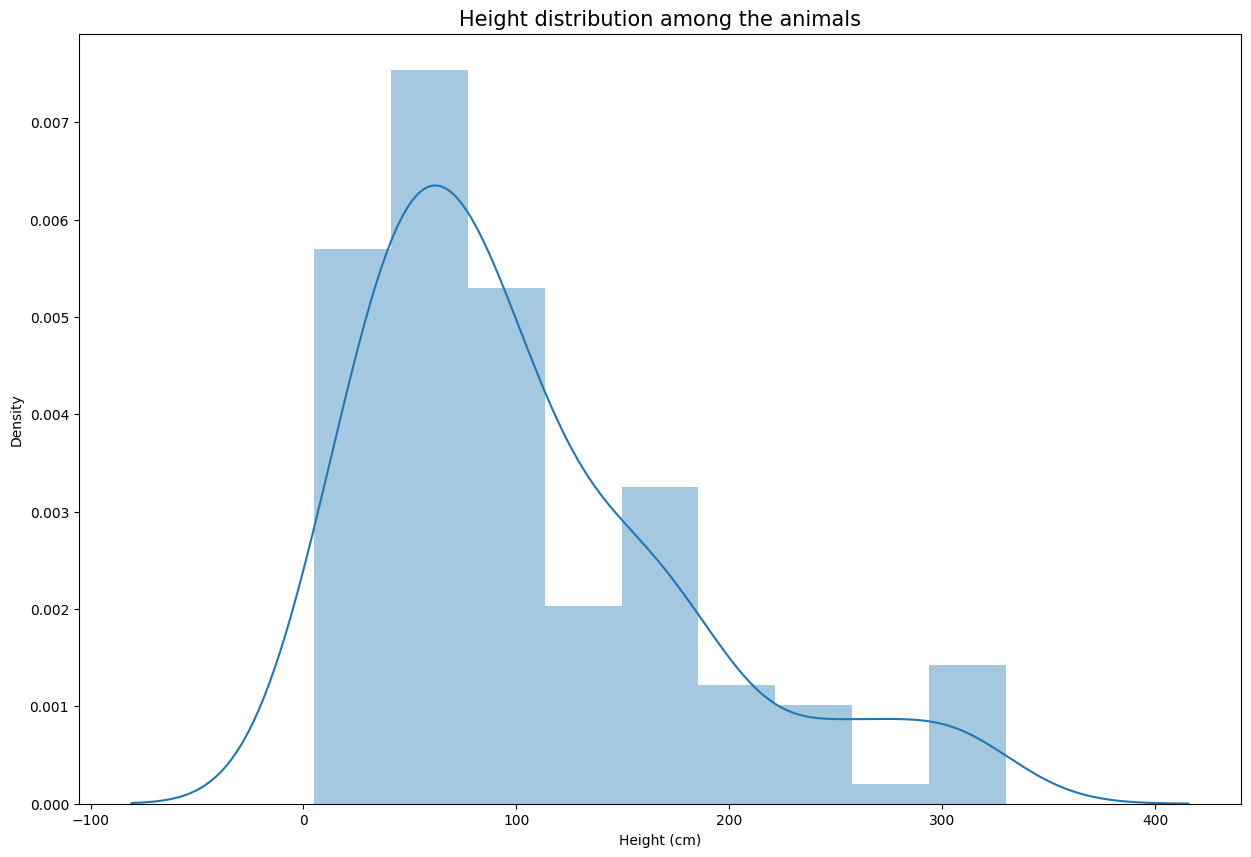

In [ ]:
plt.figure(figsize=(15,10))
data = df.copy()
data=data[data['Height (cm)'] < data['Height (cm)'].quantile(0.90)]
sns.distplot(data['Height (cm)'].sort_values())
plt.title("Height distribution among the animals",fontsize=15)
plt.show()

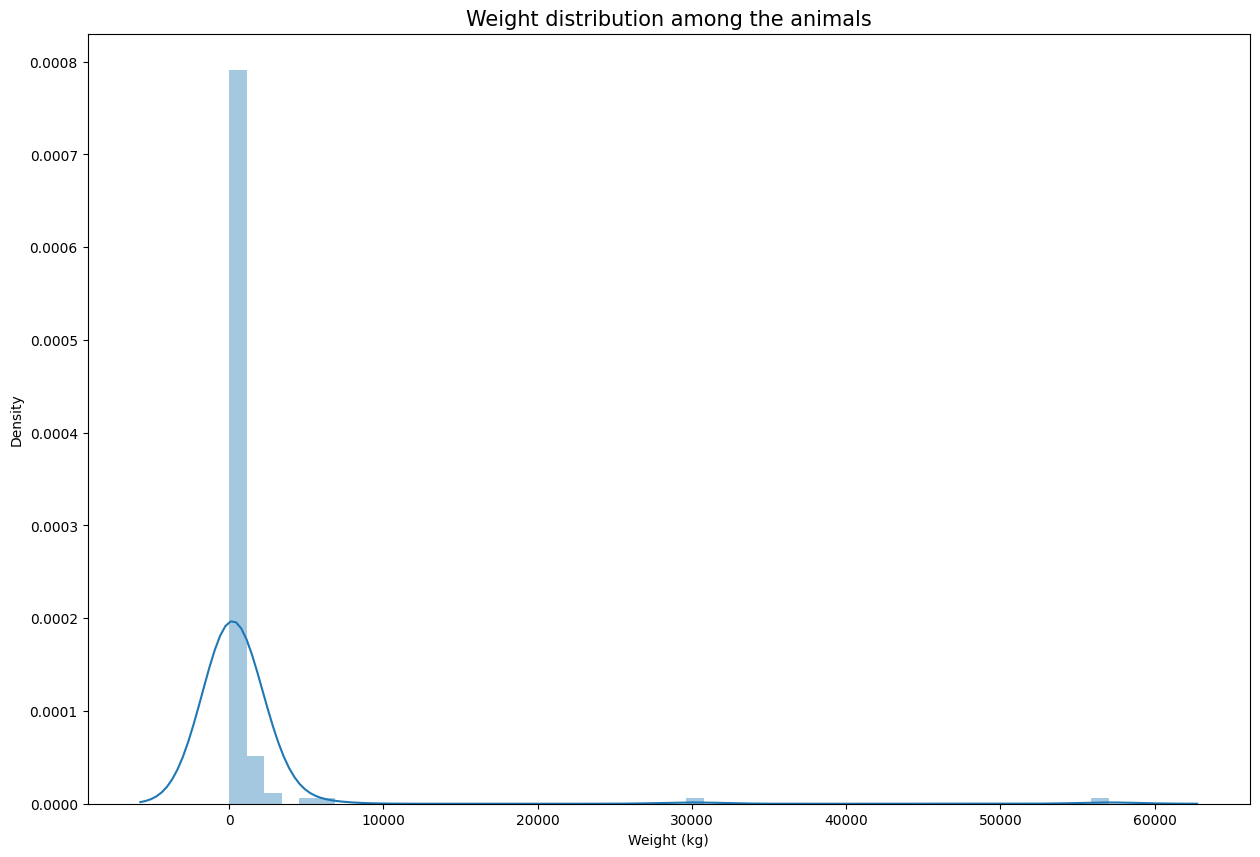

In [ ]:
plt.figure(figsize=(15,10))
data2=df.copy()
data2=data2[data2['Weight (kg)'] < data2['Weight (kg)'].quantile(0.90)]
sns.distplot(df['Weight (kg)'].sort_values())
plt.title("Weight distribution among the animals",fontsize=15)
plt.show()

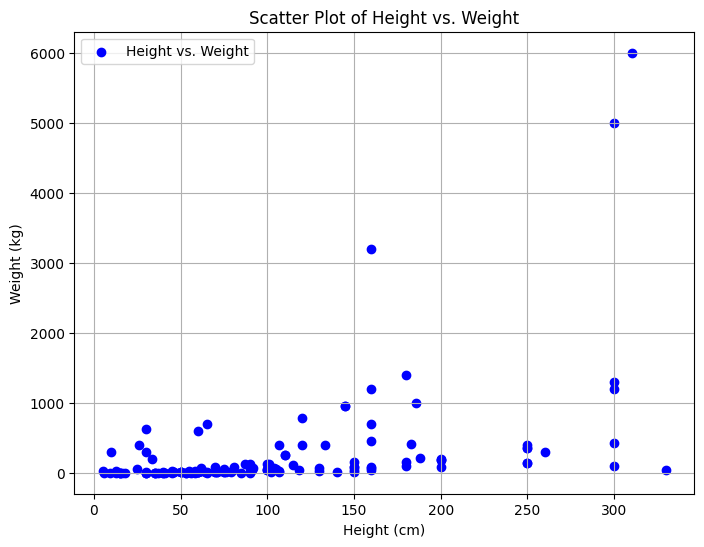

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Height (cm)'], data['Weight (kg)'], c='blue', marker='o', label='Height vs. Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Scatter Plot of Height vs. Weight')
plt.legend()
plt.grid(True)
plt.show()

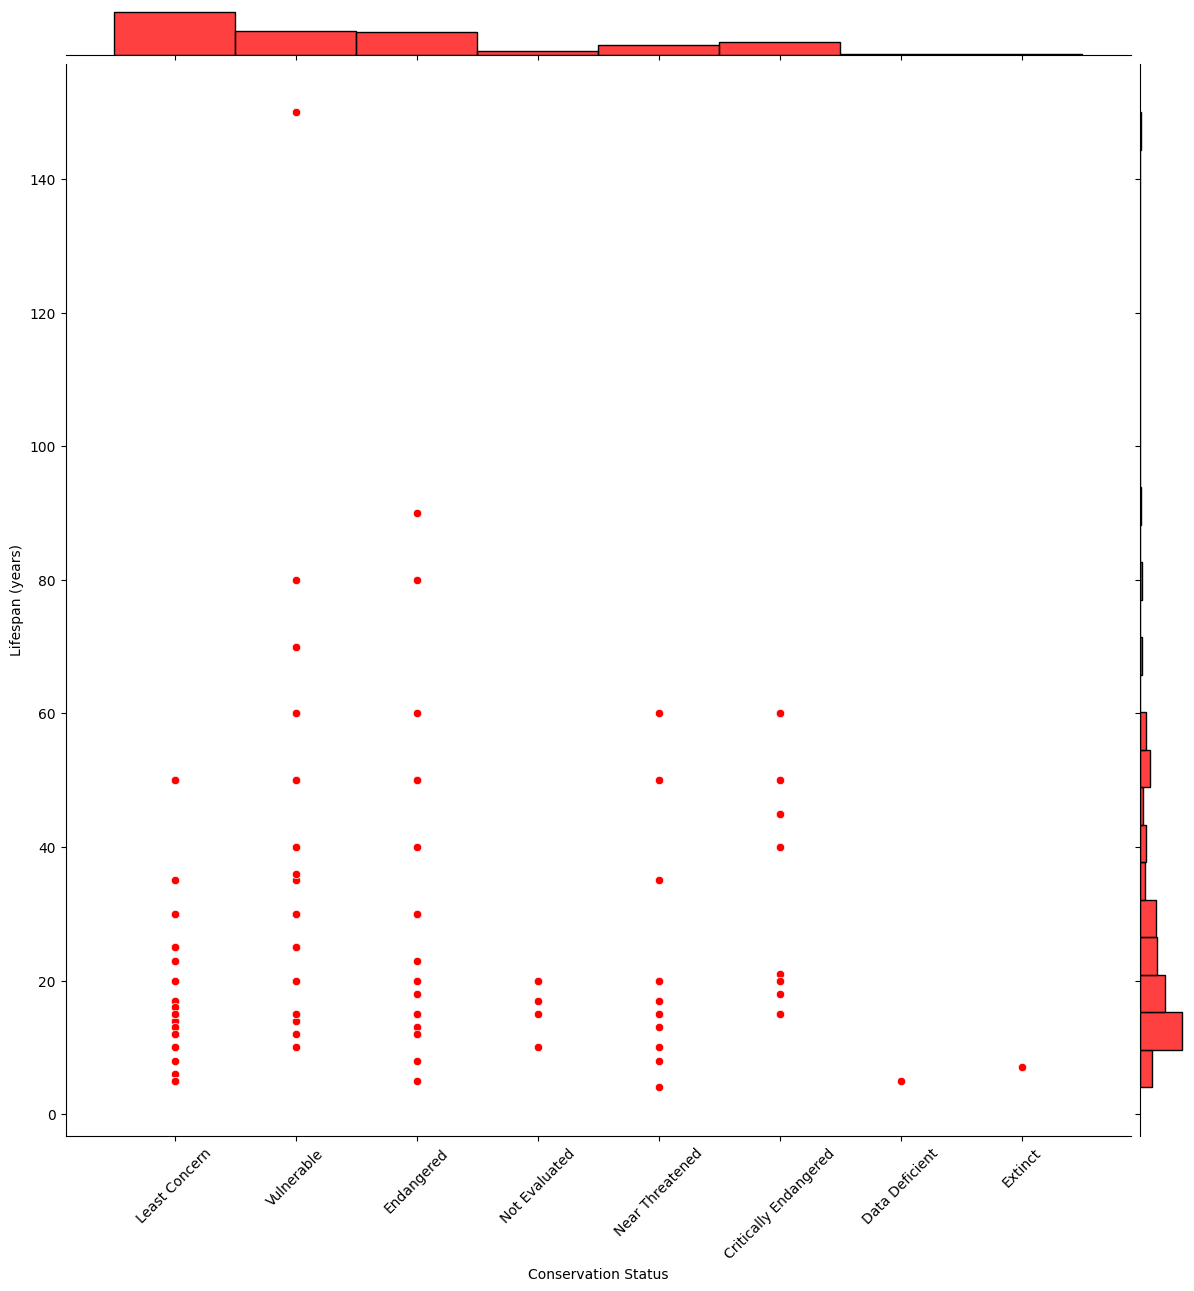

In [ ]:
sns.jointplot(x="Conservation Status", y="Lifespan (years)", data=df, height=12, ratio=20, color="r")
plt.xticks(rotation=45)
plt.show()


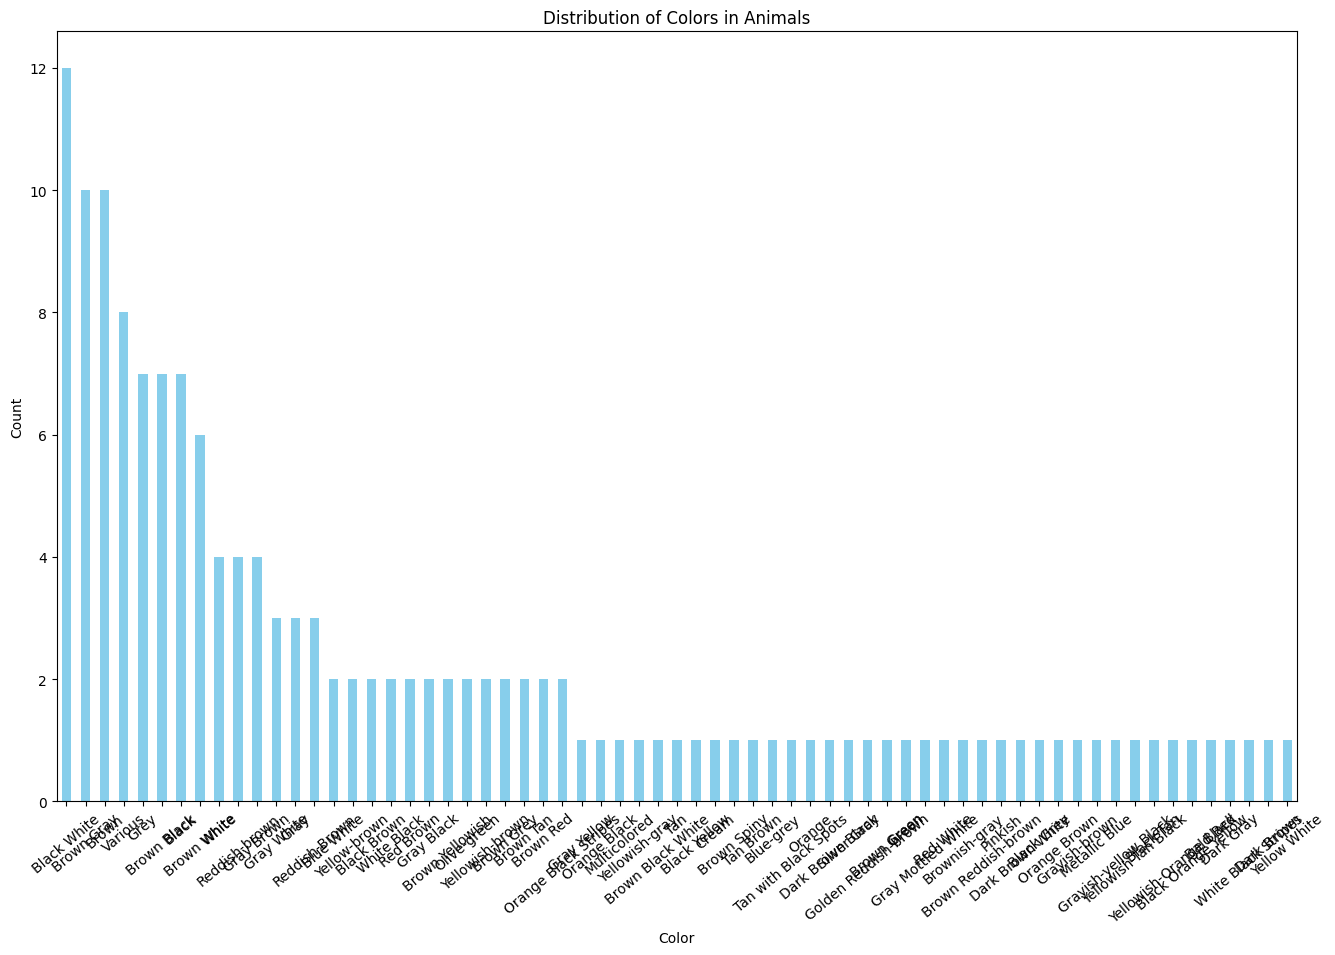

In [ ]:
plt.figure(figsize=(16, 10))
df['Color'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Distribution of Colors in Animals')
plt.xticks(rotation=40)
plt.show()

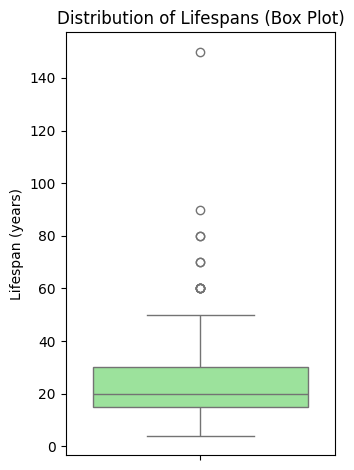

In [ ]:
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Lifespan (years)', color='lightgreen')
plt.ylabel('Lifespan (years)')
plt.title('Distribution of Lifespans (Box Plot)')

plt.tight_layout()
plt.show()

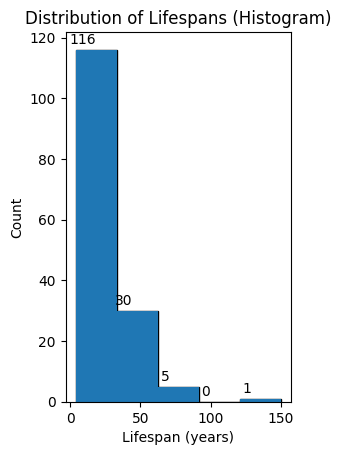

In [ ]:
plt.subplot(1, 2, 2)
plt.hist(df['Lifespan (years)'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Lifespan (years)')
plt.ylabel('Count')
plt.title('Distribution of Lifespans (Histogram)')
counts, bin_edges, _ = plt.hist(df['Lifespan (years)'], bins=5)

for count, x in zip(counts, bin_edges):
    plt.text(x + 5, count + 1, str(int(count)), ha='center', va='bottom')


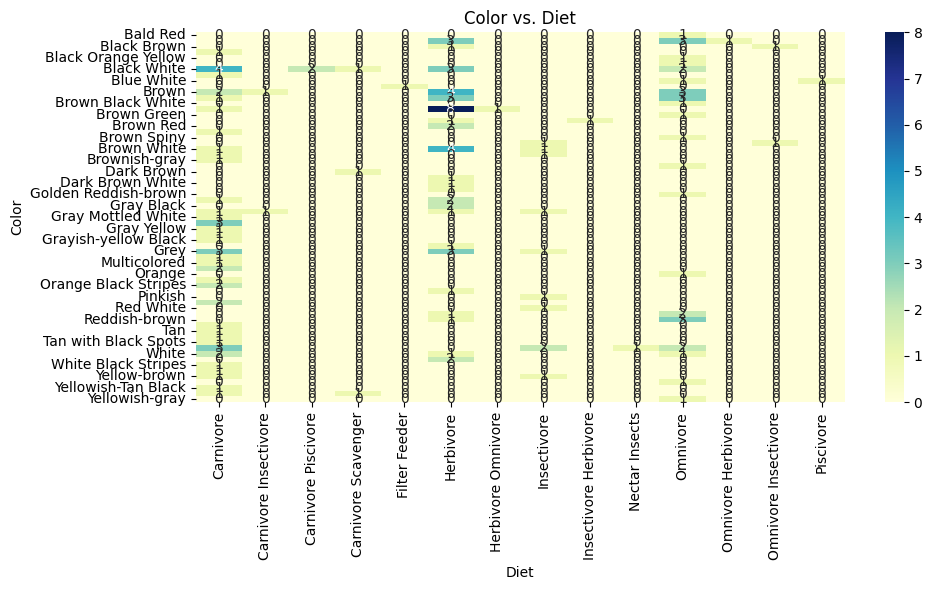

In [ ]:

color_diet = pd.crosstab(df['Color'], df['Diet'])

color_habitat = pd.crosstab(df['Color'], df['Habitat 1'])

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.heatmap(color_diet, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Color vs. Diet')

plt.tight_layout()

Text(0.5, 1.0, 'Color vs. Habitat 1')

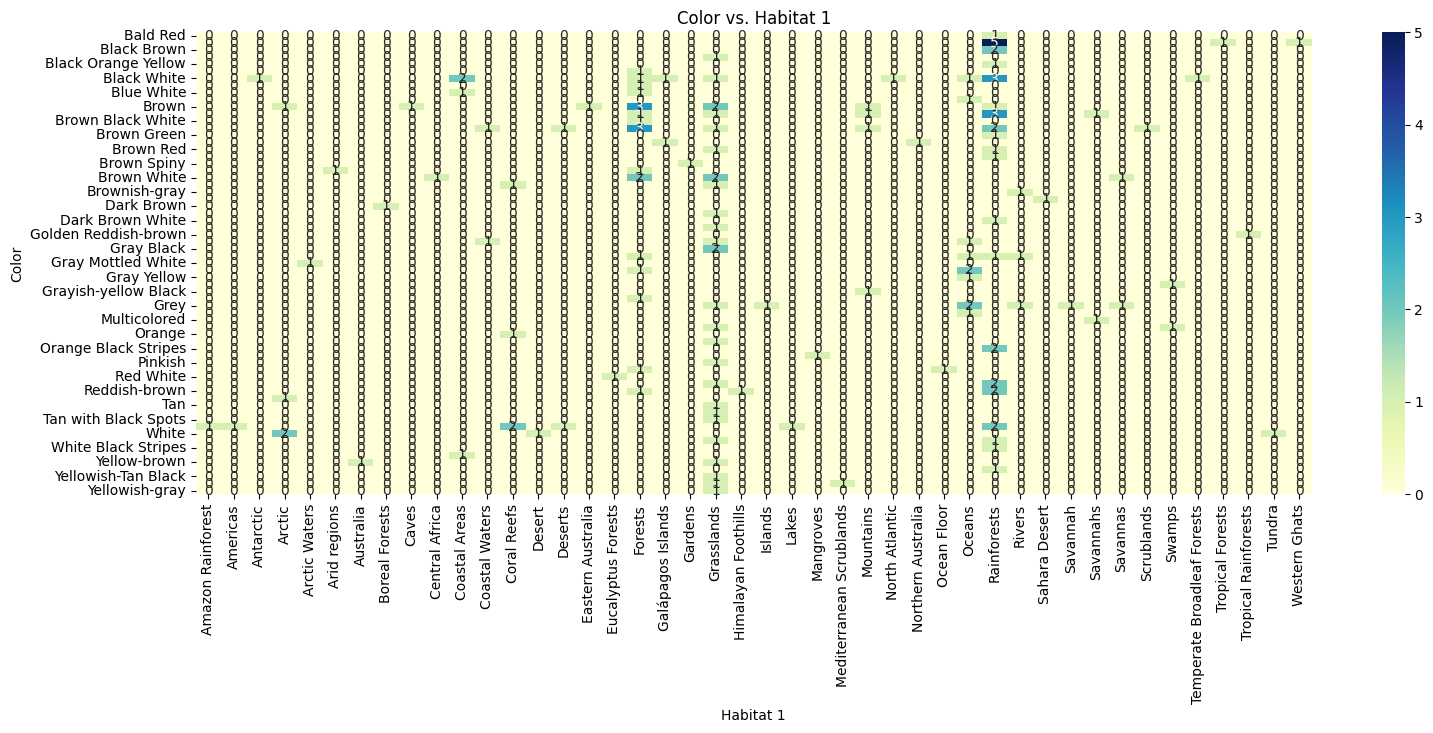

In [ ]:

plt.figure(figsize=(18, 6))
sns.heatmap(color_habitat, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Color vs. Habitat 1')


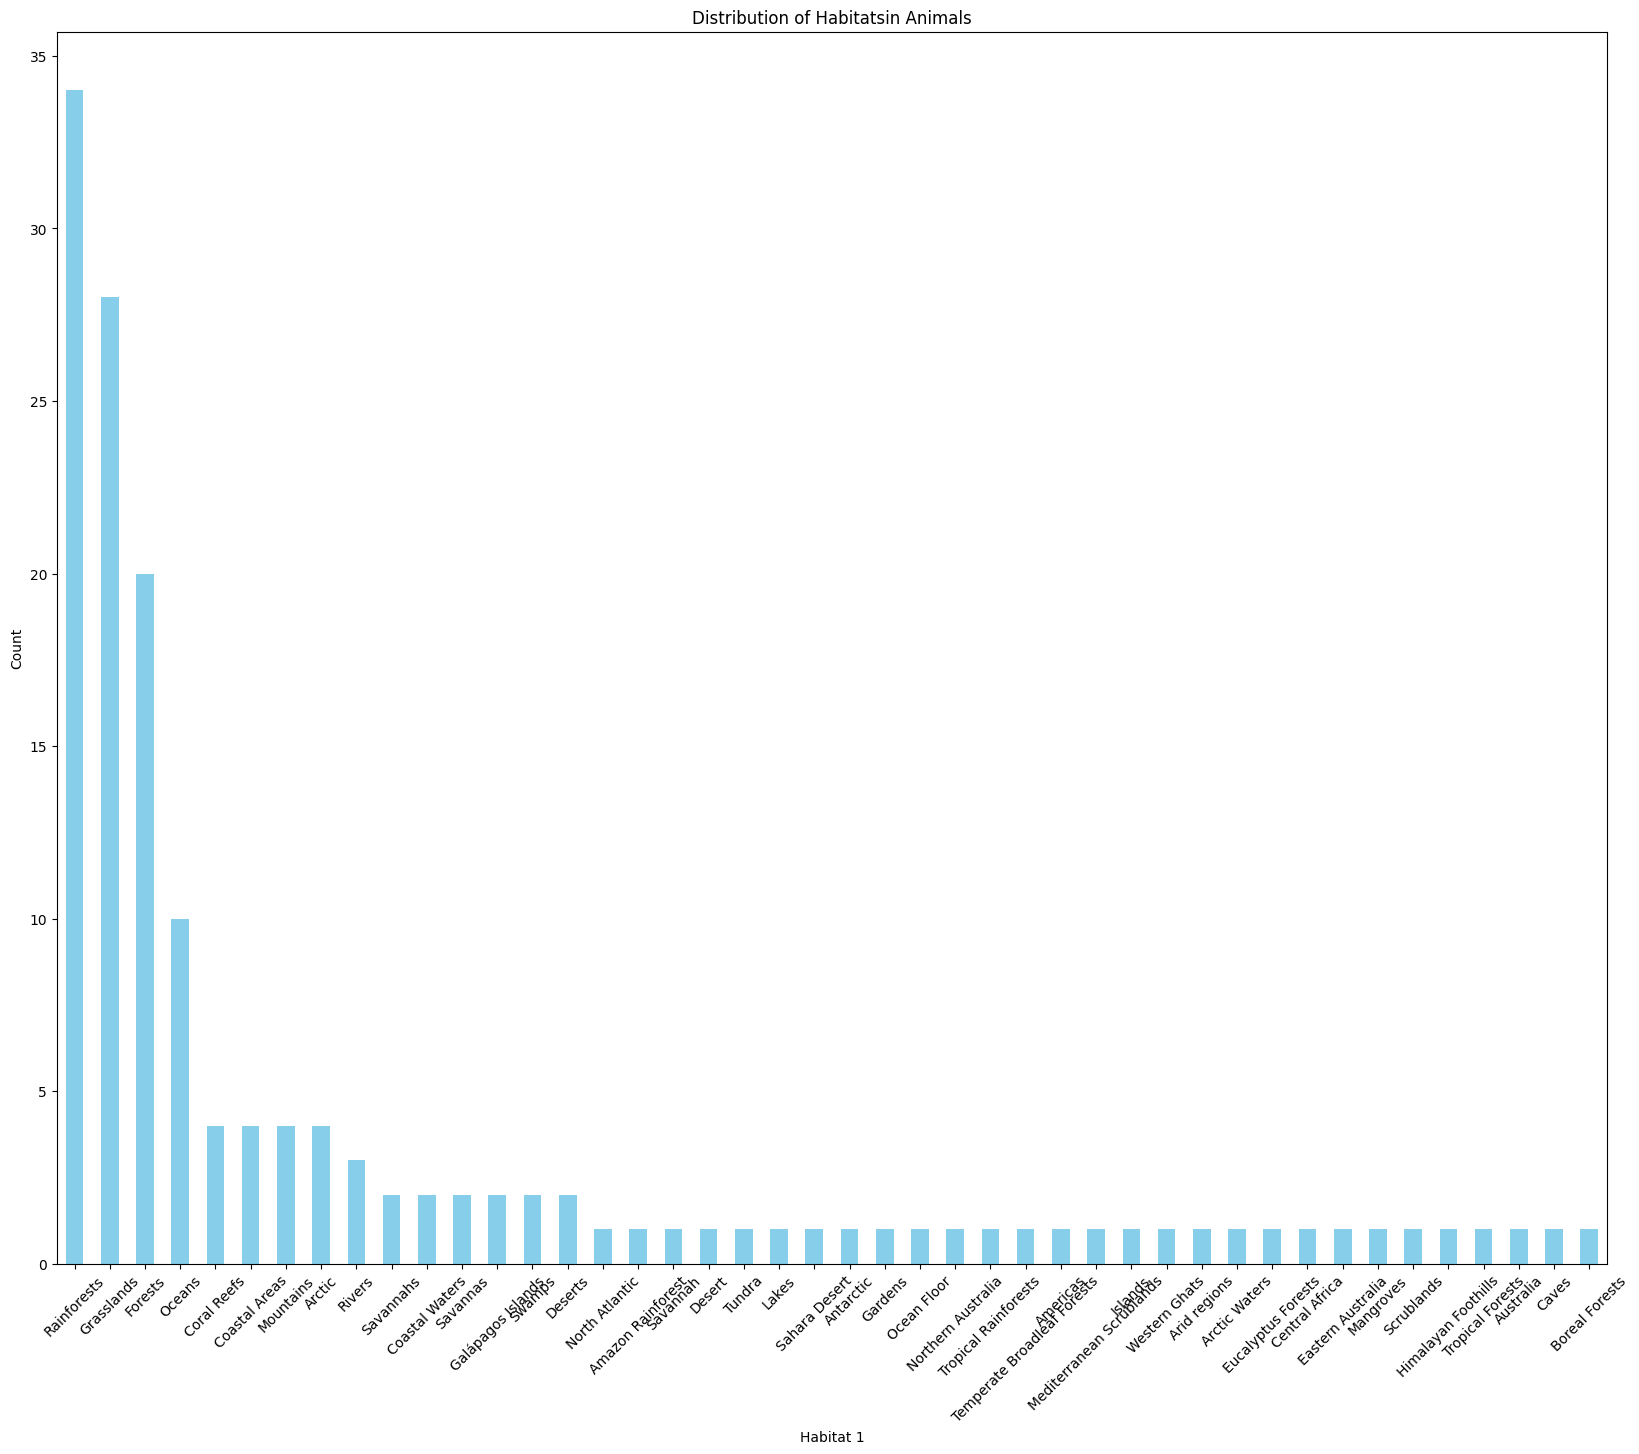

In [ ]:
plt.figure(figsize=(20, 16))
df['Habitat 1'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Habitat 1')
plt.ylabel('Count')
plt.title('Distribution of Habitatsin Animals')
plt.xticks(rotation=45)
plt.show()

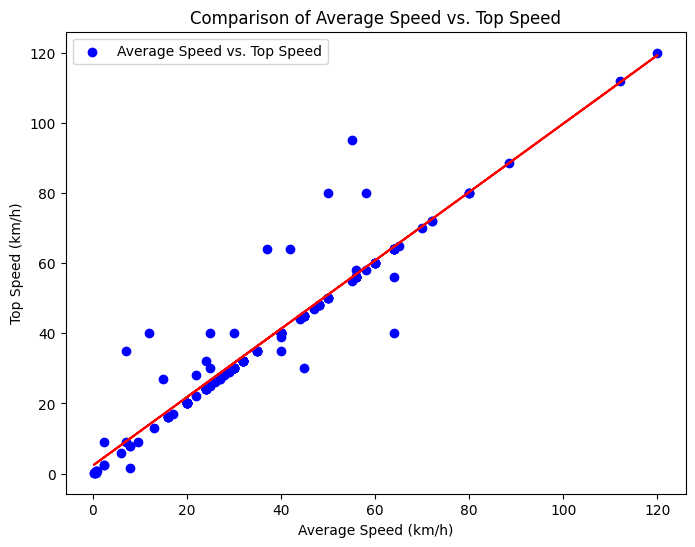

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(df['Average Speed (km/h)'], df['Top Speed (km/h)'], c='blue', marker='o', label='Average Speed vs. Top Speed')
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Top Speed (km/h)')
plt.title('Comparison of Average Speed vs. Top Speed')
plt.legend()

fit = np.polyfit(df['Average Speed (km/h)'], df['Top Speed (km/h)'], 1)
plt.plot(df['Average Speed (km/h)'], fit[0] * df['Average Speed (km/h)'] + fit[1], color='red')

plt.show()

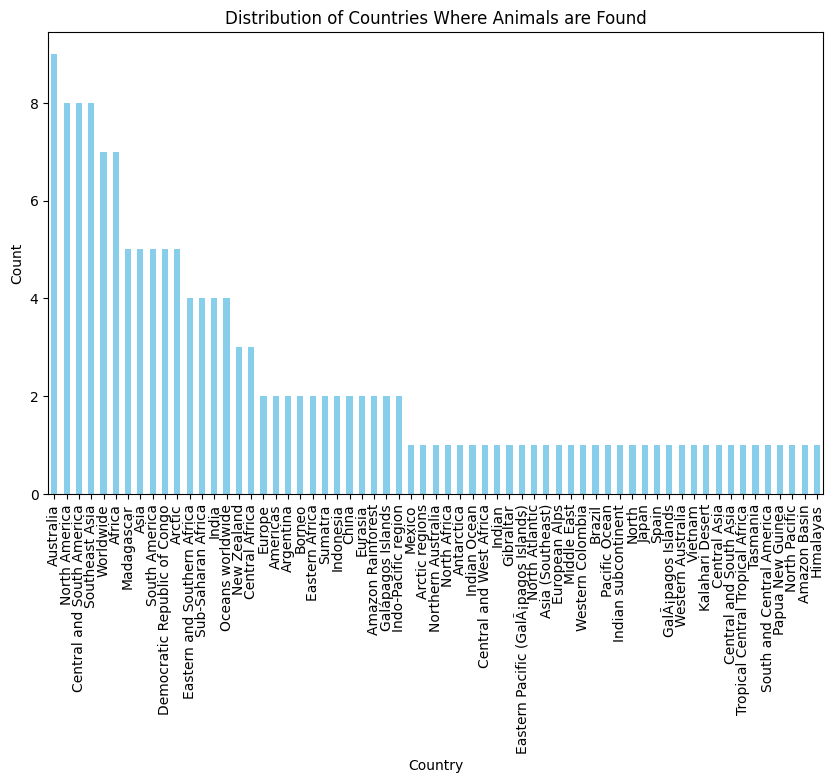

In [ ]:

country_counts = df['Countries Found'].value_counts()
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Countries Where Animals are Found')
plt.show()

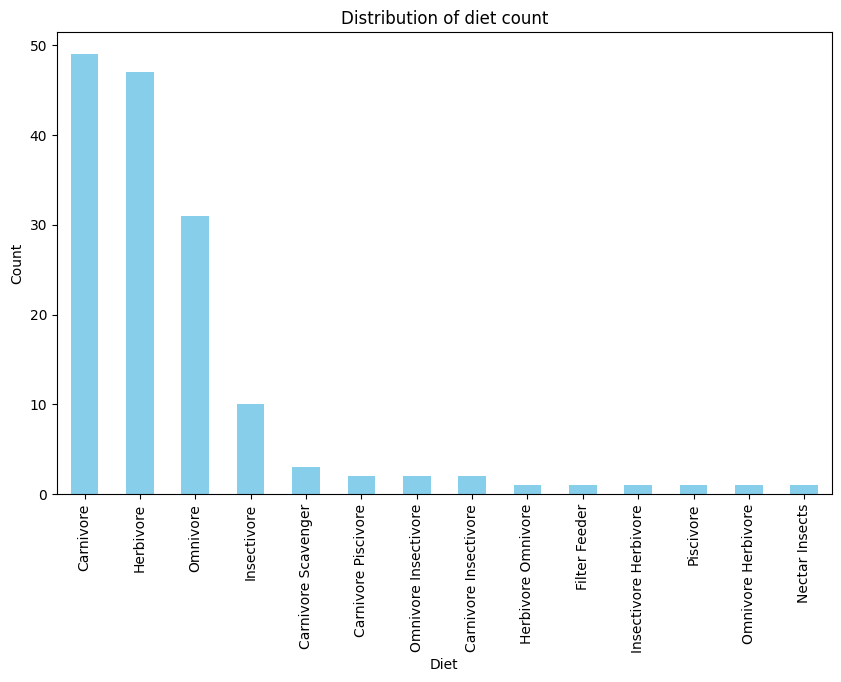

In [ ]:

country_counts = df['Diet'].value_counts()

plt.figure(figsize=(10, 6))

country_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Diet')
plt.ylabel('Count')
plt.title('Distribution of diet count')
plt.show()

![](https://evolutionletters.files.wordpress.com/2020/07/diets_2.png?w=940)

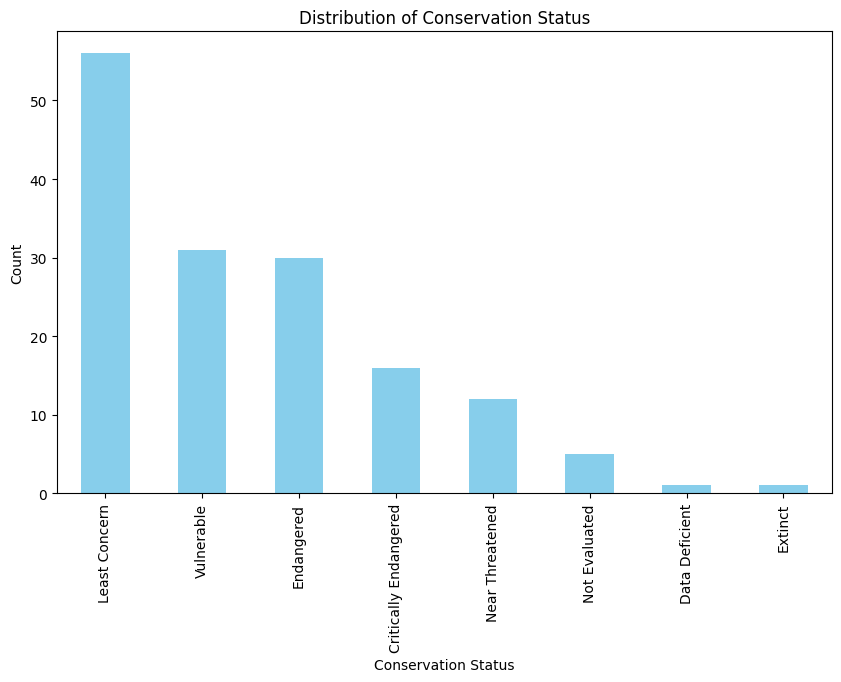

In [ ]:

country_counts = df['Conservation Status'].value_counts()
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.title('Distribution of Conservation Status')
plt.show()

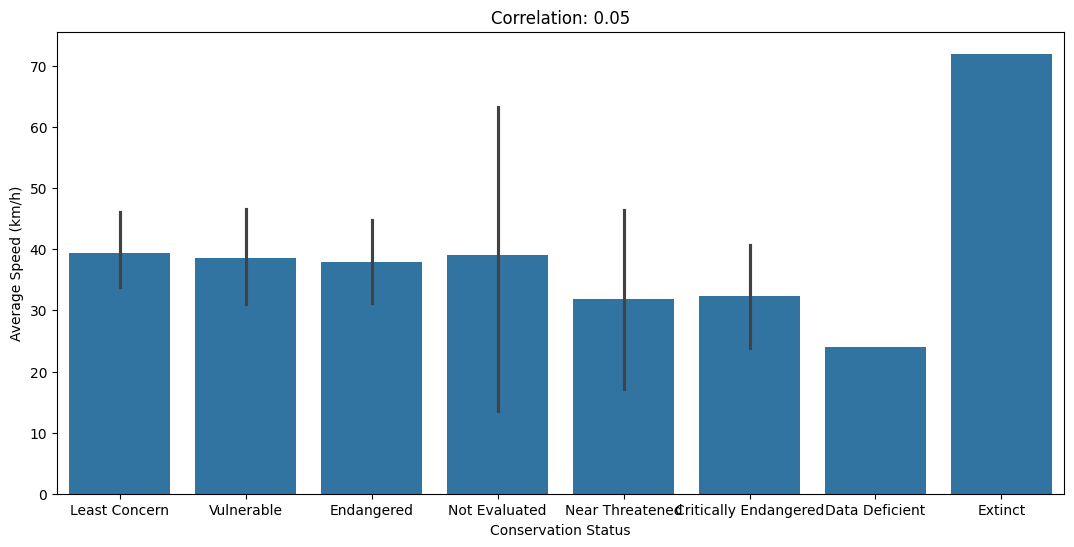

In [ ]:

correlation = df['Conservation Status'].astype('category').cat.codes.corr(df['Average Speed (km/h)'])
plt.figure(figsize=(13, 6))
sns.barplot(x='Conservation Status', y='Average Speed (km/h)', data=df)
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

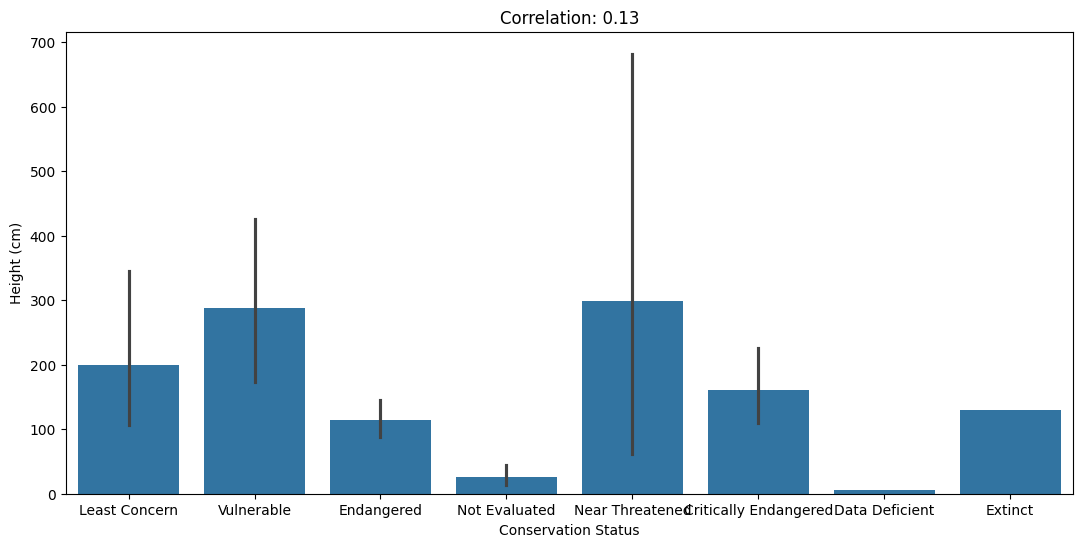

In [ ]:

correlation = df['Conservation Status'].astype('category').cat.codes.corr(df['Height (cm)'])
plt.figure(figsize=(13, 6))
sns.barplot(x='Conservation Status', y='Height (cm)', data=df)
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

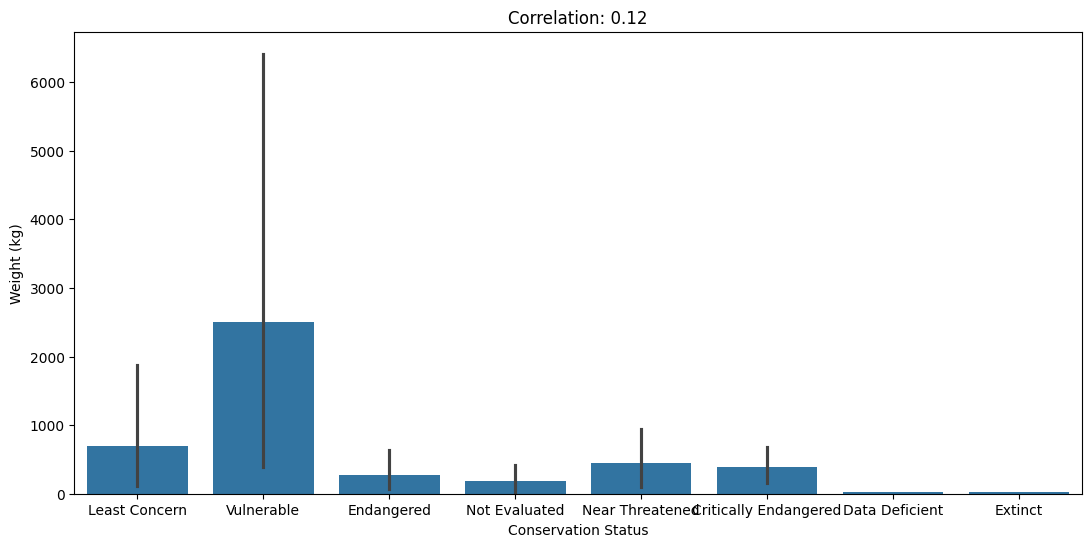

In [ ]:

correlation = df['Conservation Status'].astype('category').cat.codes.corr(df['Weight (kg)'])
plt.figure(figsize=(13, 6))
sns.barplot(x='Conservation Status', y='Weight (kg)', data=df)
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

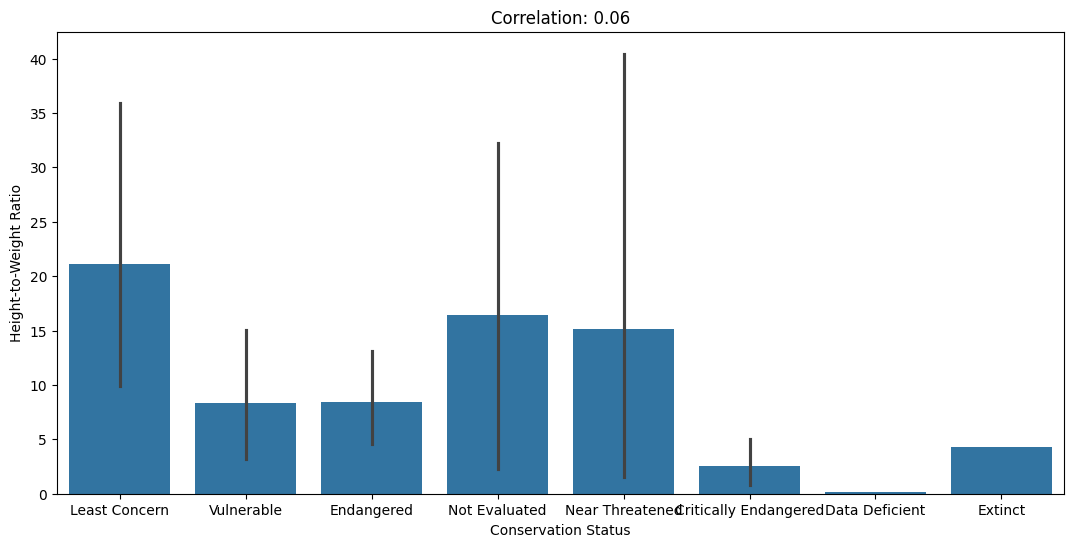

In [ ]:

correlation = df['Conservation Status'].astype('category').cat.codes.corr(df['Height-to-Weight Ratio'])
plt.figure(figsize=(13, 6))
sns.barplot(x='Conservation Status', y='Height-to-Weight Ratio', data=df)
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

In [ ]:
pd.DataFrame(df.groupby('Family')[['Habitat 1', 'Diet']].agg(pd.Series.unique))

,Habitat 1,Diet
Family,,
Accipitridae,"[Forests, Rainforests]",[Carnivore]
Agamidae,"[Deserts, Northern Australia]","[Omnivore, Insectivore Herbivore]"
Ailuridae,[Himalayan Foothills],[Herbivore]
Alcidae,"[North Atlantic, Coastal Areas]","[Carnivore Piscivore, Carnivore]"
Ambystomatidae,[Lakes],[Carnivore]
...,...,...
Trochilidae,[Americas],[Nectar Insects]
Ursidae,"[Forests, Temperate Broadleaf Forests, Arctic,...","[Omnivore, Herbivore, Carnivore]"
Varanidae,[Islands],[Carnivore]


This table gives us an ideea of unique habitats and Diet for each family group

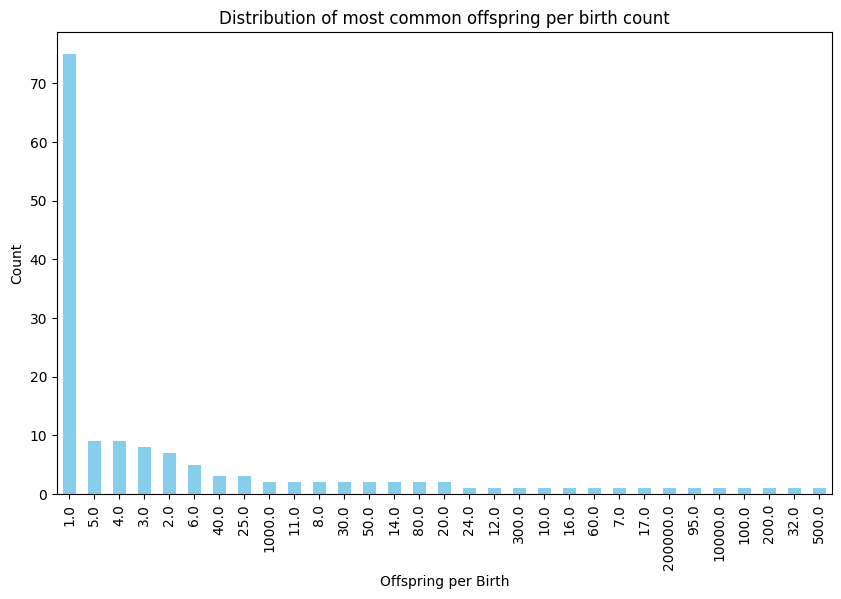

In [ ]:

OffspringperBirth = df['Offspring per Birth'].value_counts()

plt.figure(figsize=(10, 6))

OffspringperBirth.plot(kind='bar', color='skyblue')
plt.xlabel('Offspring per Birth')
plt.ylabel('Count')
plt.title('Distribution of most common offspring per birth count')
plt.show()

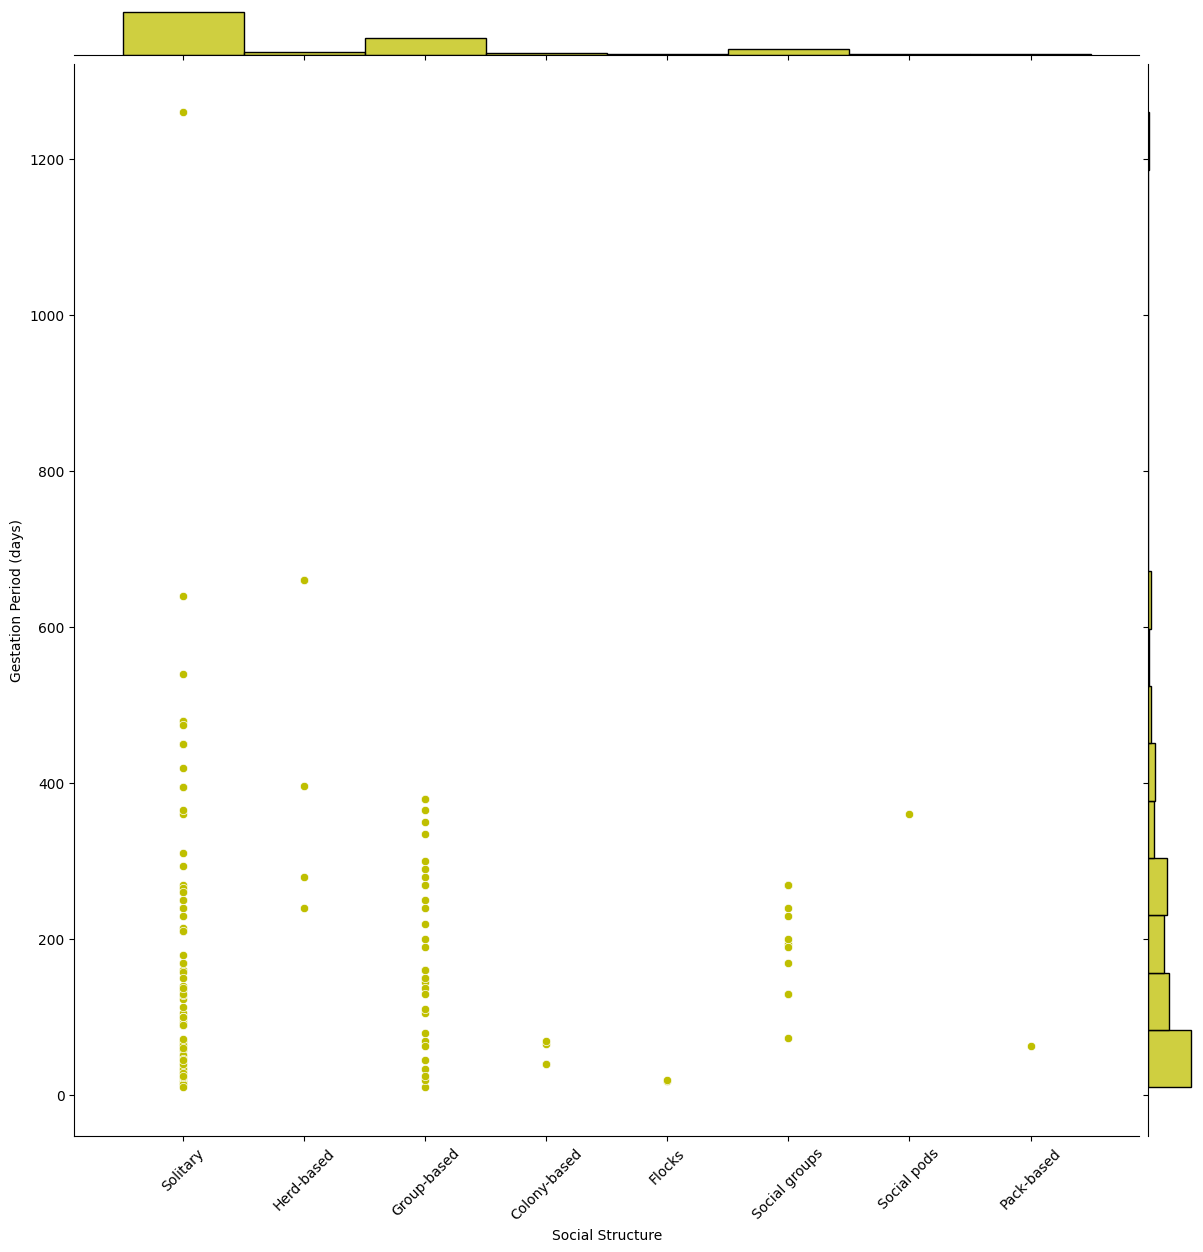

In [ ]:
sns.jointplot(y="Gestation Period (days)", x="Social Structure", data=df, height=12, ratio=20, color="y")
plt.xticks(rotation=45)
plt.show()


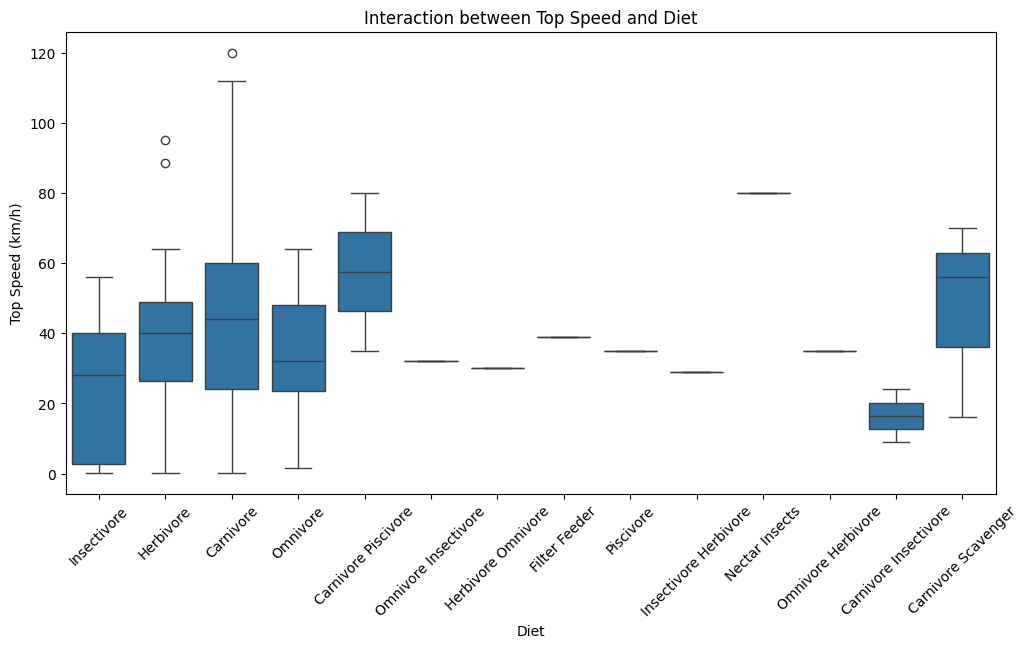

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Diet', y='Top Speed (km/h)', data=df)
plt.title('Interaction between Top Speed and Diet')
plt.xlabel('Diet')
plt.ylabel('Top Speed (km/h)')
plt.xticks(rotation=45)
plt.show()

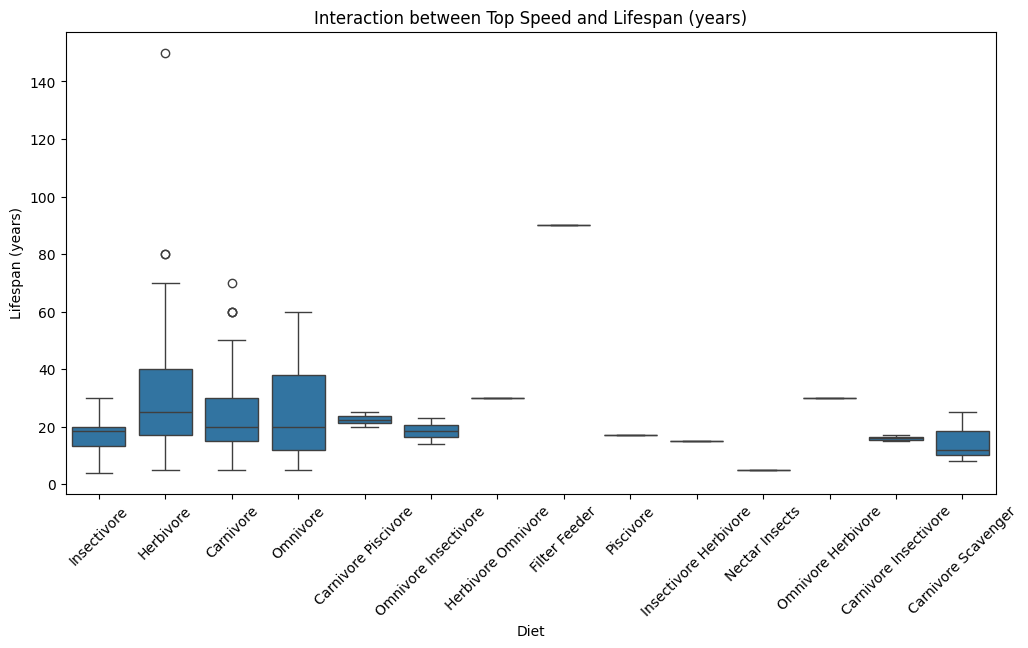

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Diet', y='Lifespan (years)', data=df)
plt.title('Interaction between Top Speed and Lifespan (years)')
plt.xlabel('Diet')
plt.ylabel('Lifespan (years)')
plt.xticks(rotation=45)
plt.show()

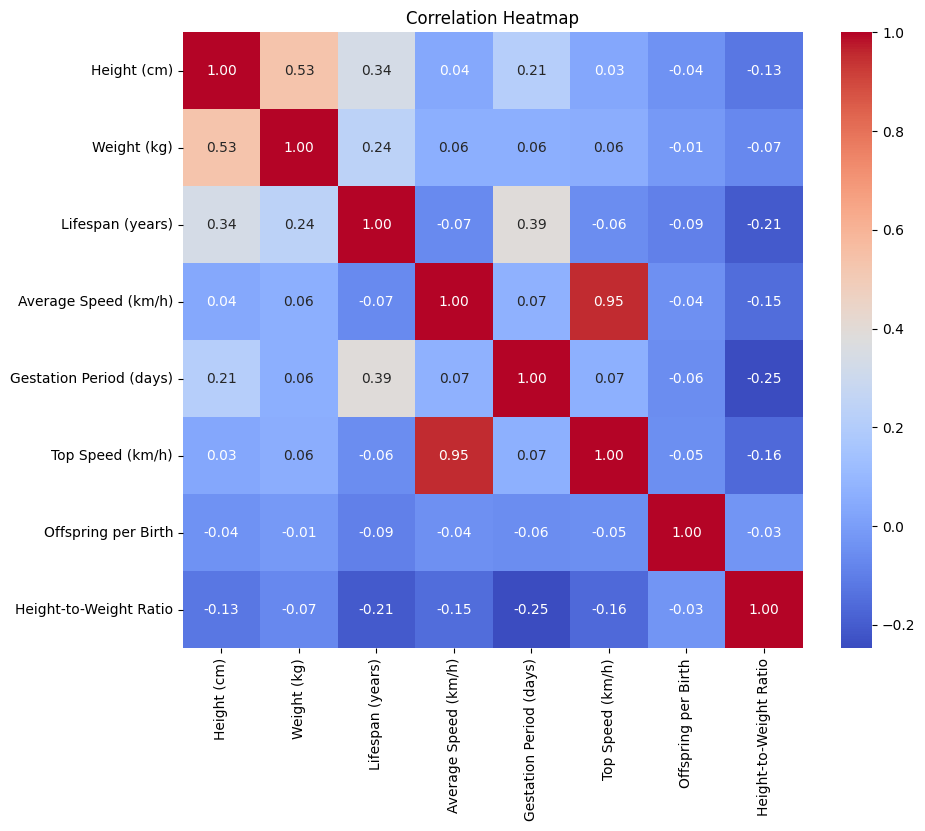

In [ ]:
numeric_cols = [x for x in df.columns if df[x].dtype in ['float64', 'int64']]
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

data = pd.read_csv("Animal Dataset.csv")  

target_column = "Animal"
features = [col for col in data.columns if col != target_column]

In [ ]:
def entropy(y):
    """Calculates entropy of a set of labels."""
    counts = Counter(y)
    probabilities = [count / len(y) for count in counts.values()]
    return -sum(p * np.log2(p) for p in probabilities if p > 0)

def information_gain(data, feature, target):
    """Calculates information gain for a given feature."""
    total_entropy = entropy(data[target])
    values = data[feature].unique()
    weighted_entropy = 0
    for value in values:
        subset = data[data[feature] == value]
        weighted_entropy += (len(subset) / len(data)) * entropy(subset[target])
    return total_entropy - weighted_entropy

In [ ]:
def select_best_question(data, features, target):
    """Selects the feature with the highest information gain."""
    gains = {feature: information_gain(data, feature, target) for feature in features}
    return max(gains, key=gains.get)

In [ ]:
import random

def akinator(data, features, target):
    current_data = data.copy()
    asked_questions = []
    question_counter = 0
    first_question = "Color"
    print(f"Question: What color is the animal?")
    unique_colors = current_data[first_question].unique()
    random_colors = random.sample(list(unique_colors), min(5, len(unique_colors))) 

    for i, color in enumerate(random_colors):
        print(f"{i+1}: {color}")
    print(f"{len(random_colors) + 1}: No answer")

    try:
        answer_index = int(input("Enter the number of your answer: ")) - 1
        if answer_index < len(random_colors):
            answer = random_colors[answer_index]
            current_data = current_data[current_data[first_question] == answer]
        else:
            answer = "No answer"
    except (ValueError, IndexError):
        print("Invalid input. Please try again.")
        return

    asked_questions.append(first_question)
    question_counter += 1

    while len(current_data[target].unique()) > 1 and question_counter < 20: #prevent endless loop
        remaining_features = [f for f in features if f not in asked_questions]
        if not remaining_features:
            print("No more questions to ask.")
            break

        best_question = select_best_question(current_data, remaining_features, target)
        asked_questions.append(best_question)
        question_counter += 1

        print(f"Question: {best_question}?")
        unique_values = current_data[best_question].unique()
        if len(unique_values) > 2:
            random_values = random.sample(list(unique_values), min(5, len(unique_values)))
            for i, val in enumerate(random_values):
                print(f"{i+1}: {val}")
            print(f"{len(random_values) + 1}: No answer")

            try:
                answer_index = int(input("Enter the number of your answer: ")) - 1
                if answer_index < len(random_values):
                    answer = random_values[answer_index]
                    current_data = current_data[current_data[best_question] == answer]
                else:
                    answer = "No answer"

            except (ValueError, IndexError):
                print("Invalid input. Please try again.")
                return
        else:
            answer = input("Answer (yes/no or value): ").lower()
            if answer in ["yes", "no"]:
                if answer == "yes":
                    unique_values = current_data[best_question].unique()
                    answer = unique_values[0]
                else:
                    unique_values = current_data[best_question].unique()
                    answer = unique_values[1]
            else:
                try:
                    answer = type(current_data[best_question].iloc[0])(answer)
                    current_data = current_data[current_data[best_question] == answer]
                except ValueError:
                    print("invalid answer")
                    return

        if len(current_data) == 0:
            print("Sorry, I don't have an animal that matches your answers.")
            return

    if len(current_data[target].unique()) == 1:
        print(f"I think your animal is: {current_data[target].iloc[0]}")
    else:
        print("I could not determine the animal")

In [ ]:
akinator(data, features, target_column)

Question: What color is the animal?
1: Gray, Yellow
2: Grayish-yellow, Black
3: Black, Orange, Yellow
4: Brown, Reddish-brown
5: Blue, White
6: No answer
Question: Weight (kg)?
1: 40-70
2: Up to 0.8
3: 8-18
4: Up to 20
5: Up to 250
6: No answer
Question: Height (cm)?
1: 30-100
2: Up to 180
3: Up to 16
4: Up to 1100
5: 50-60
6: No answer
I think your animal is: Tarsier
